In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
import requests
import base64
from elasticsearch import Elasticsearch
from urllib import parse
import pandas as pd
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import logging
logging.basicConfig(level=logging.CRITICAL)

from code_utils.elastic import get_data_from_elastic,plot_graph,interfaces_evaluation
from code_utils.utils import get_year_ipbes,get_year_ipcc,aplatir

Visualization of the contribution of each countries in ipcc references - all wgs

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


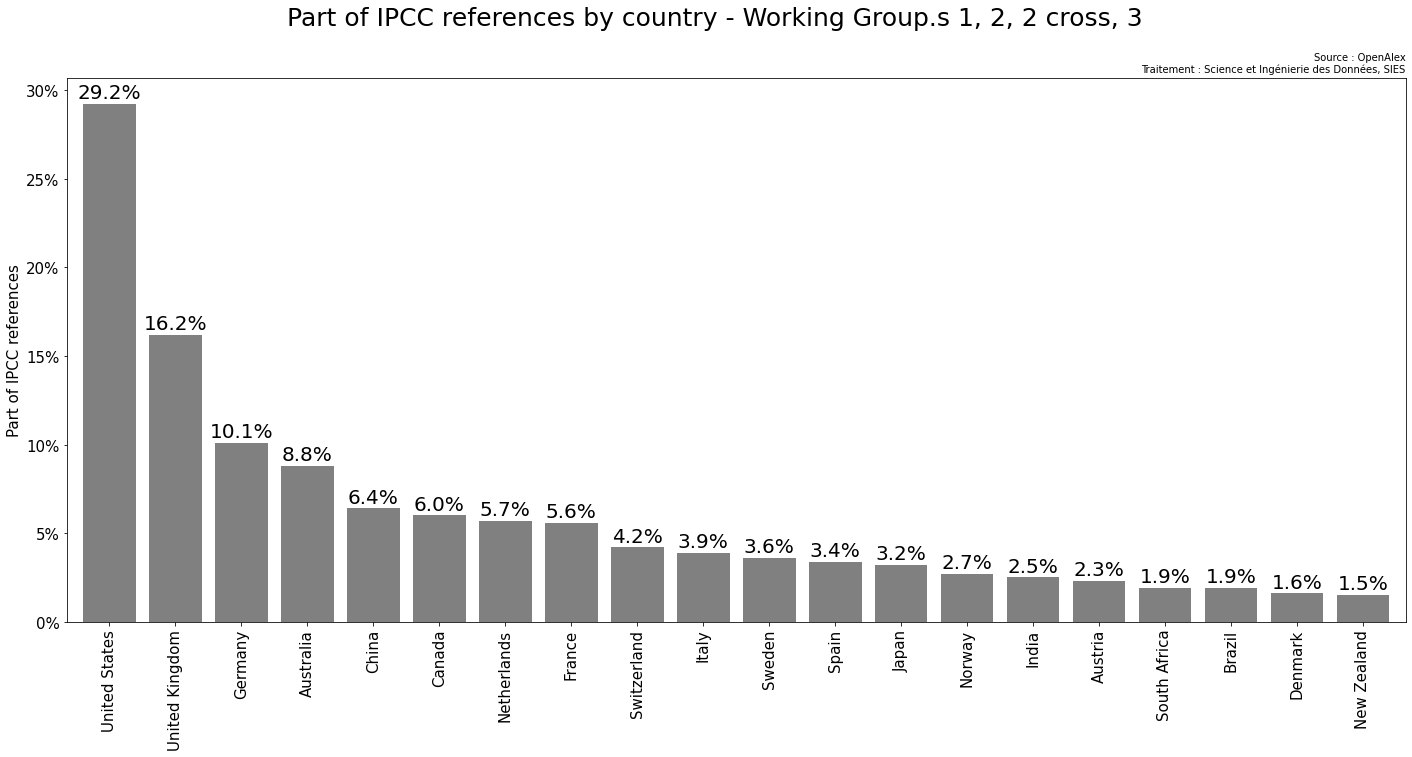

In [2]:
list_wg=["1","2","2_cross","3"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            }),list_wg)

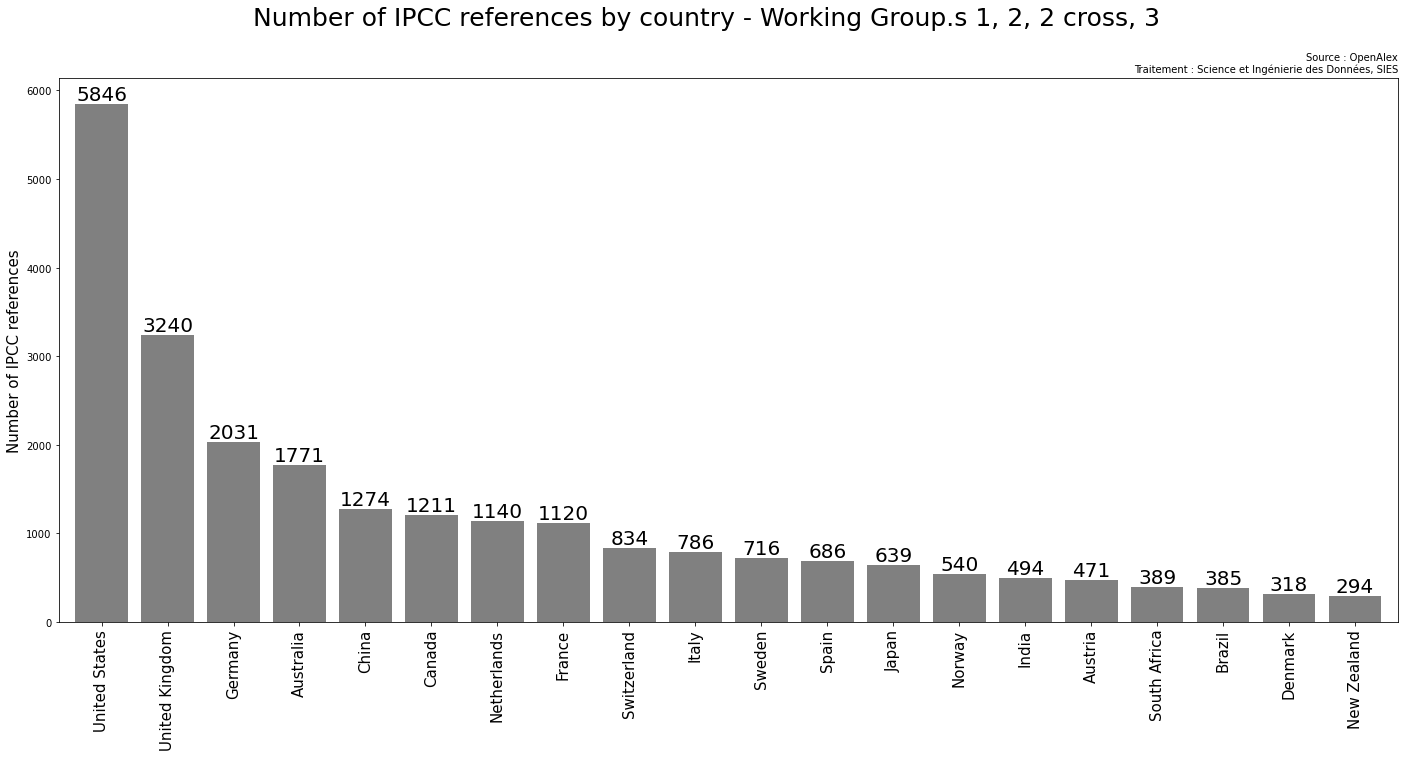

In [3]:
list_wg=["1","2","2_cross","3"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            }),list_wg,type='Number')

Visualization of the contribution of each countries in ipcc references - wg1,wg2,wg3

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


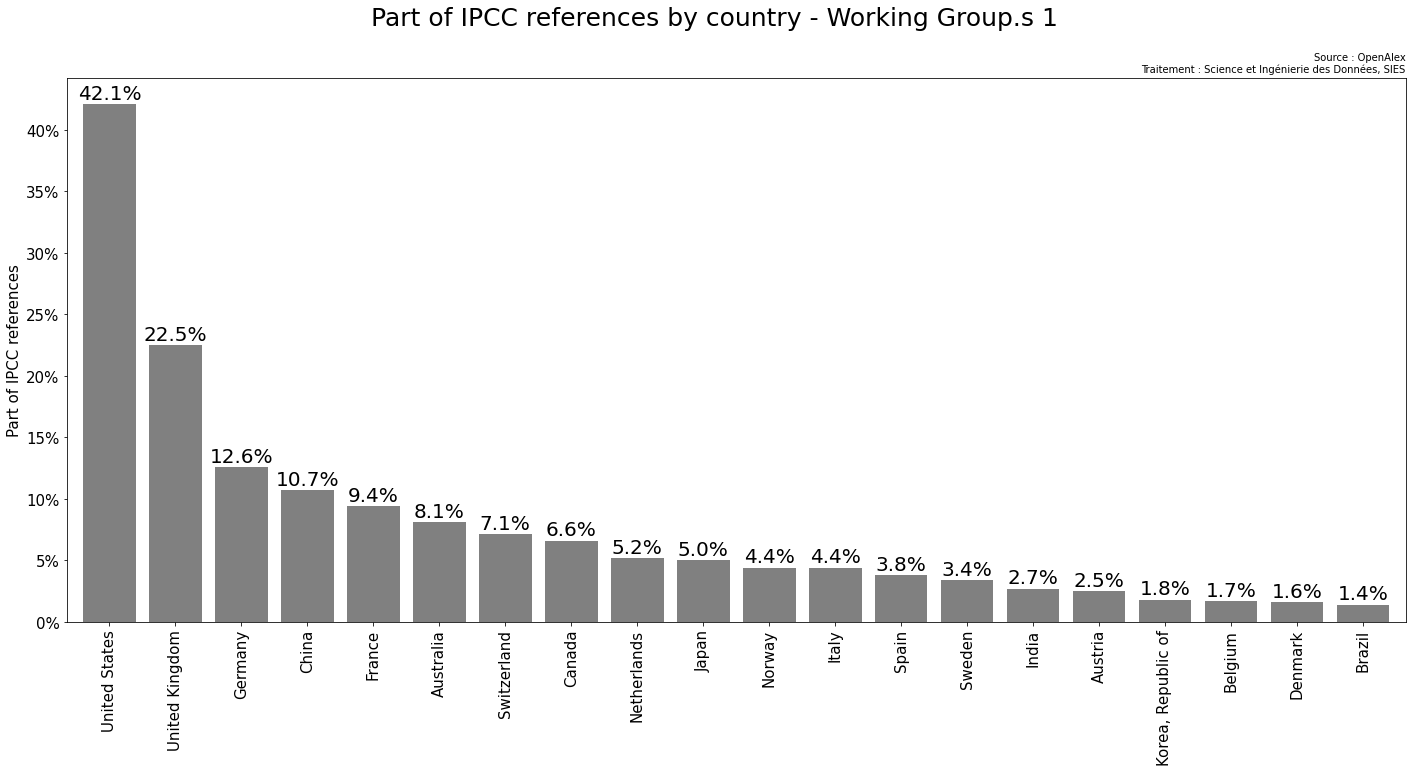

In [4]:
list_wg=["1"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


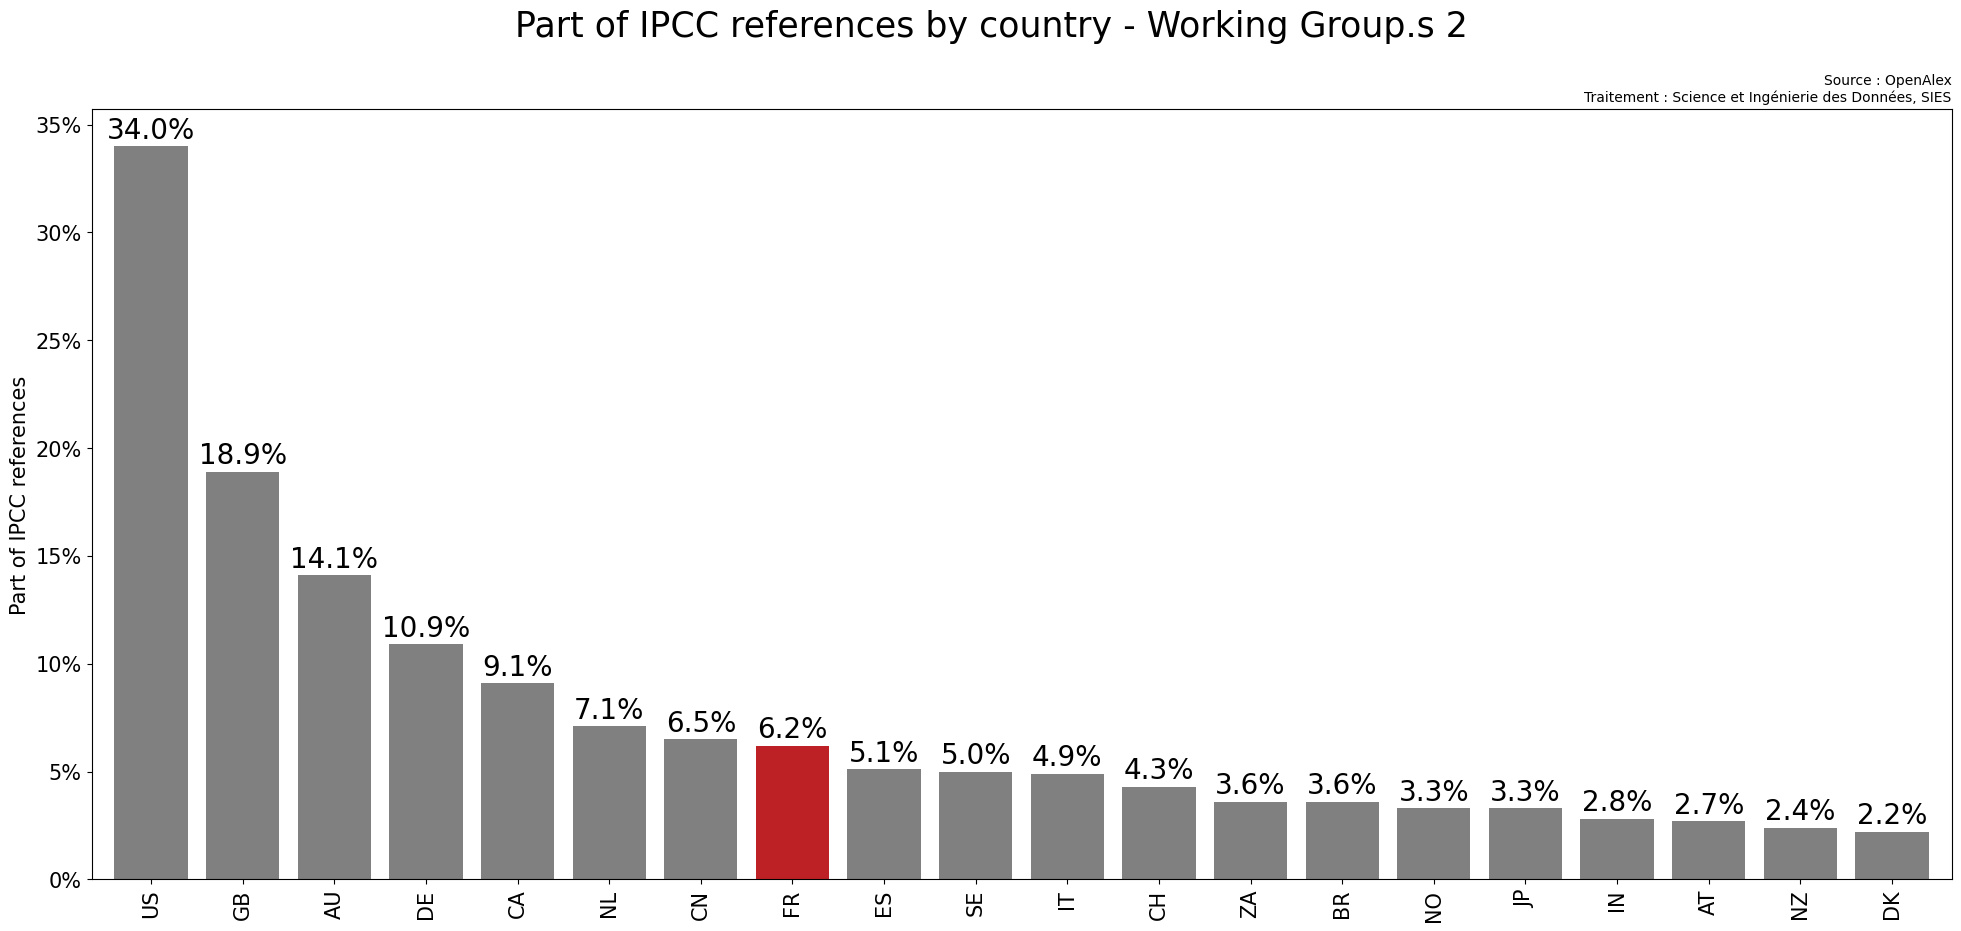

In [5]:
list_wg=["2"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


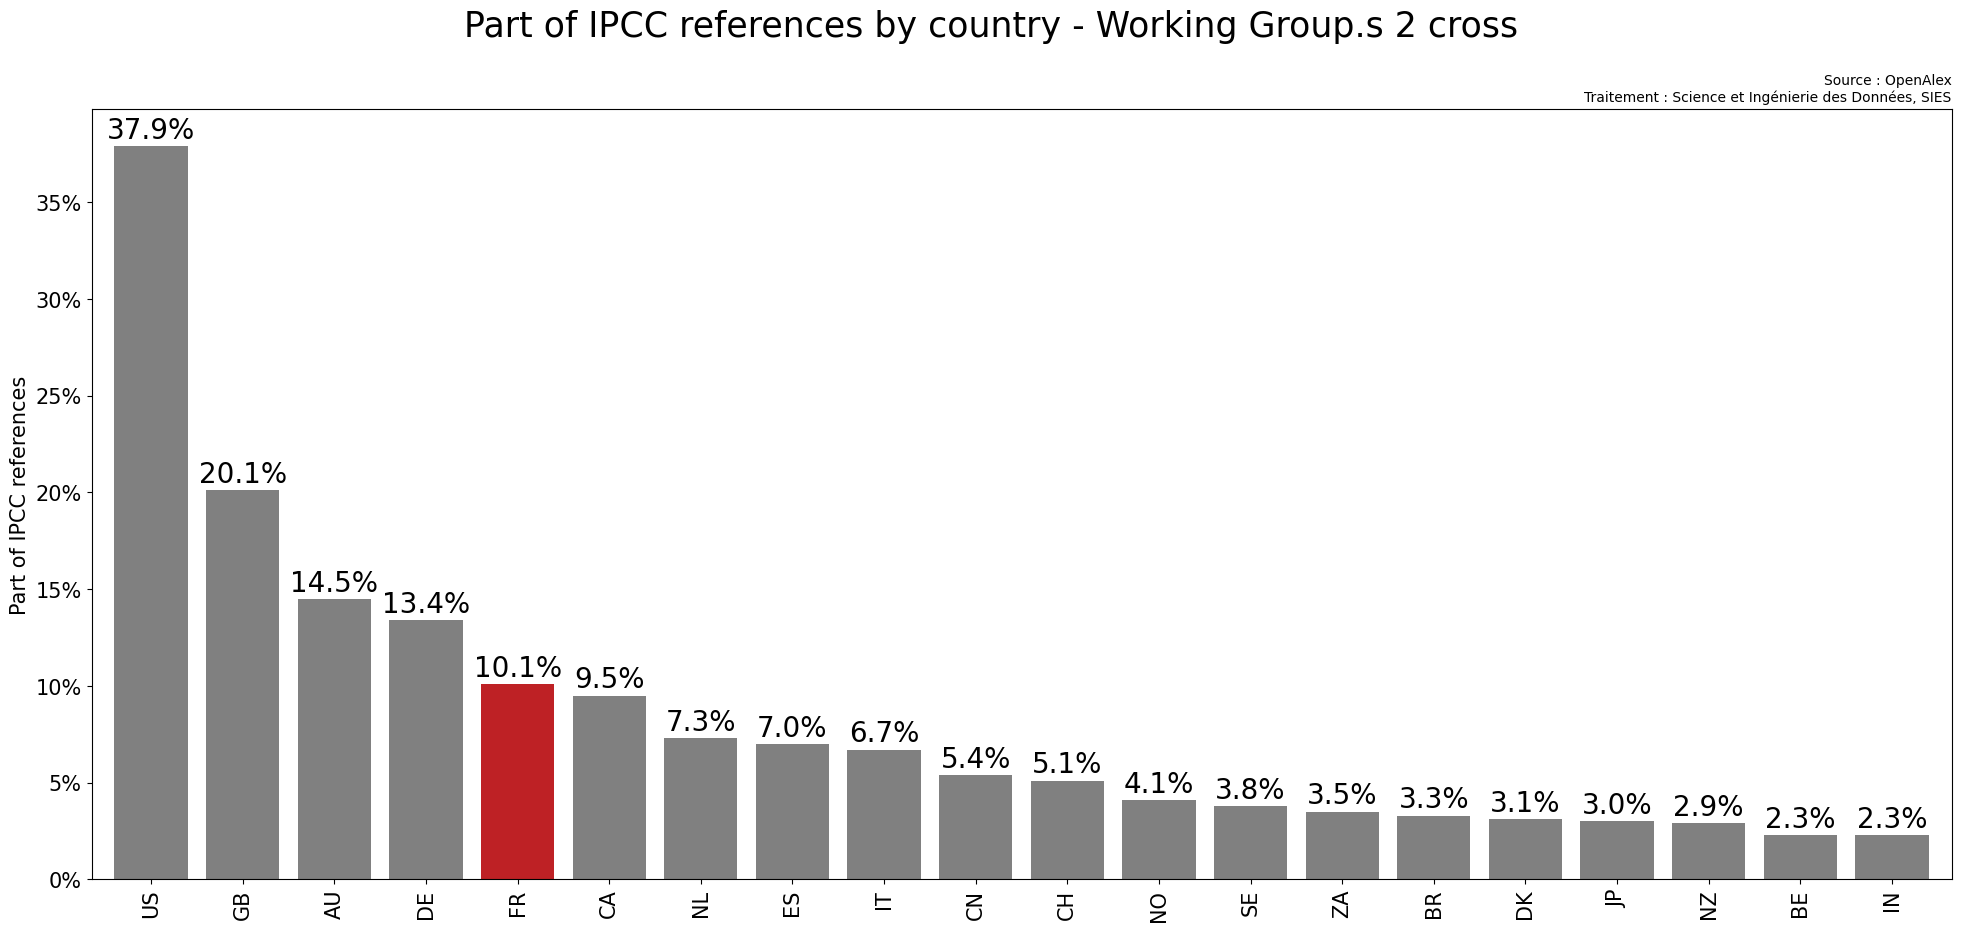

In [6]:
list_wg=["2_cross"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


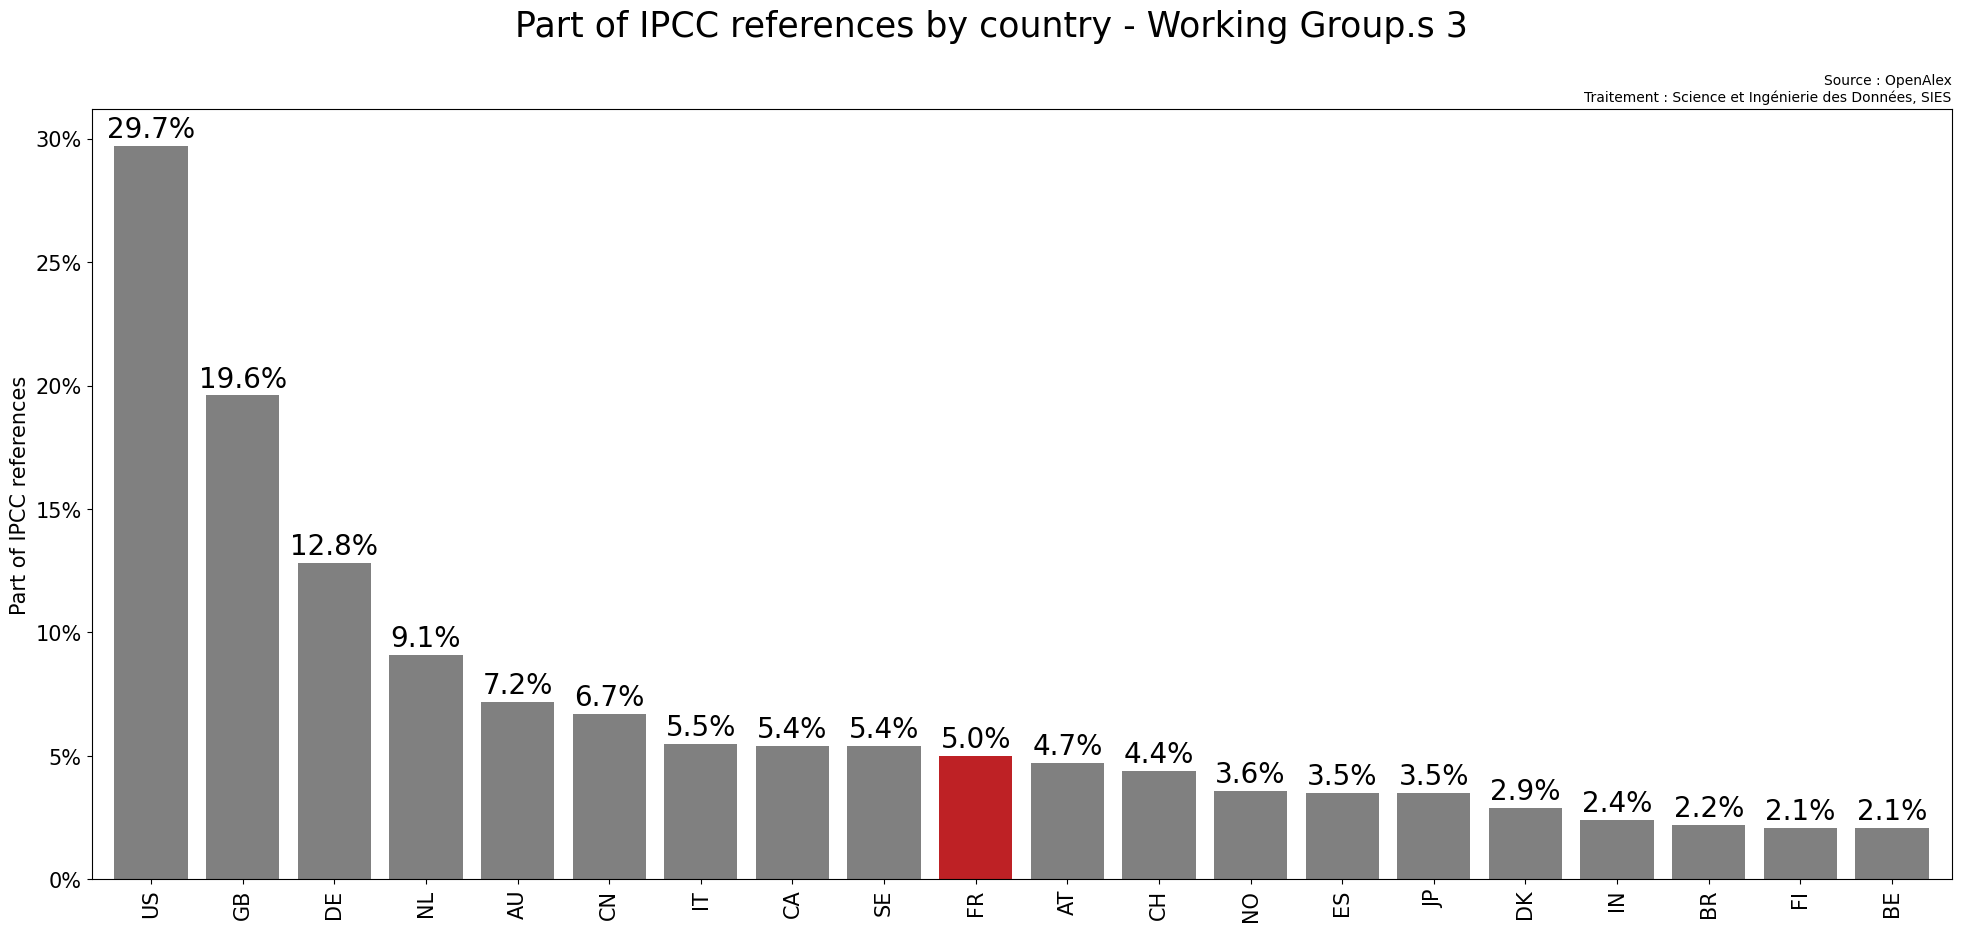

In [7]:
list_wg=["3"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

Visualization of the contribution of each countries in ipcc references - wg1 or wg2

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


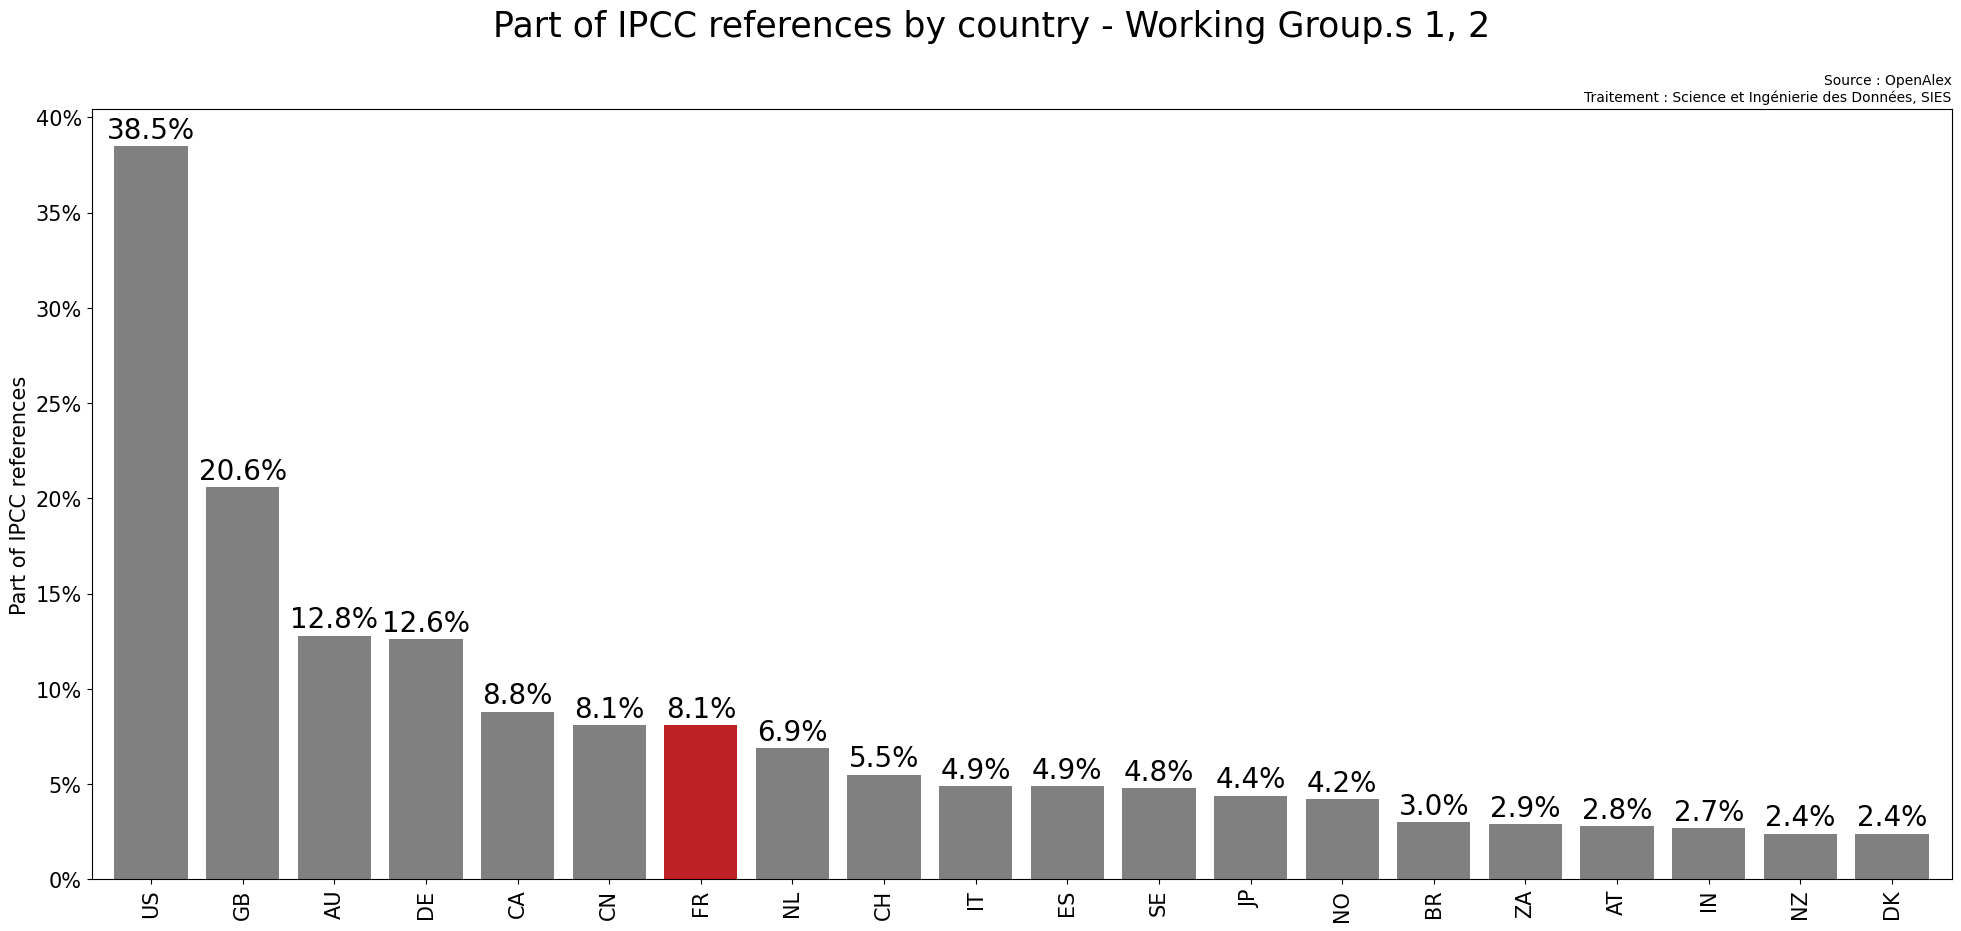

In [8]:
list_wg=["1","2"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            }),list_wg)

Visualization of the contribution of each countries in ipcc references - wg1 and wg2

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


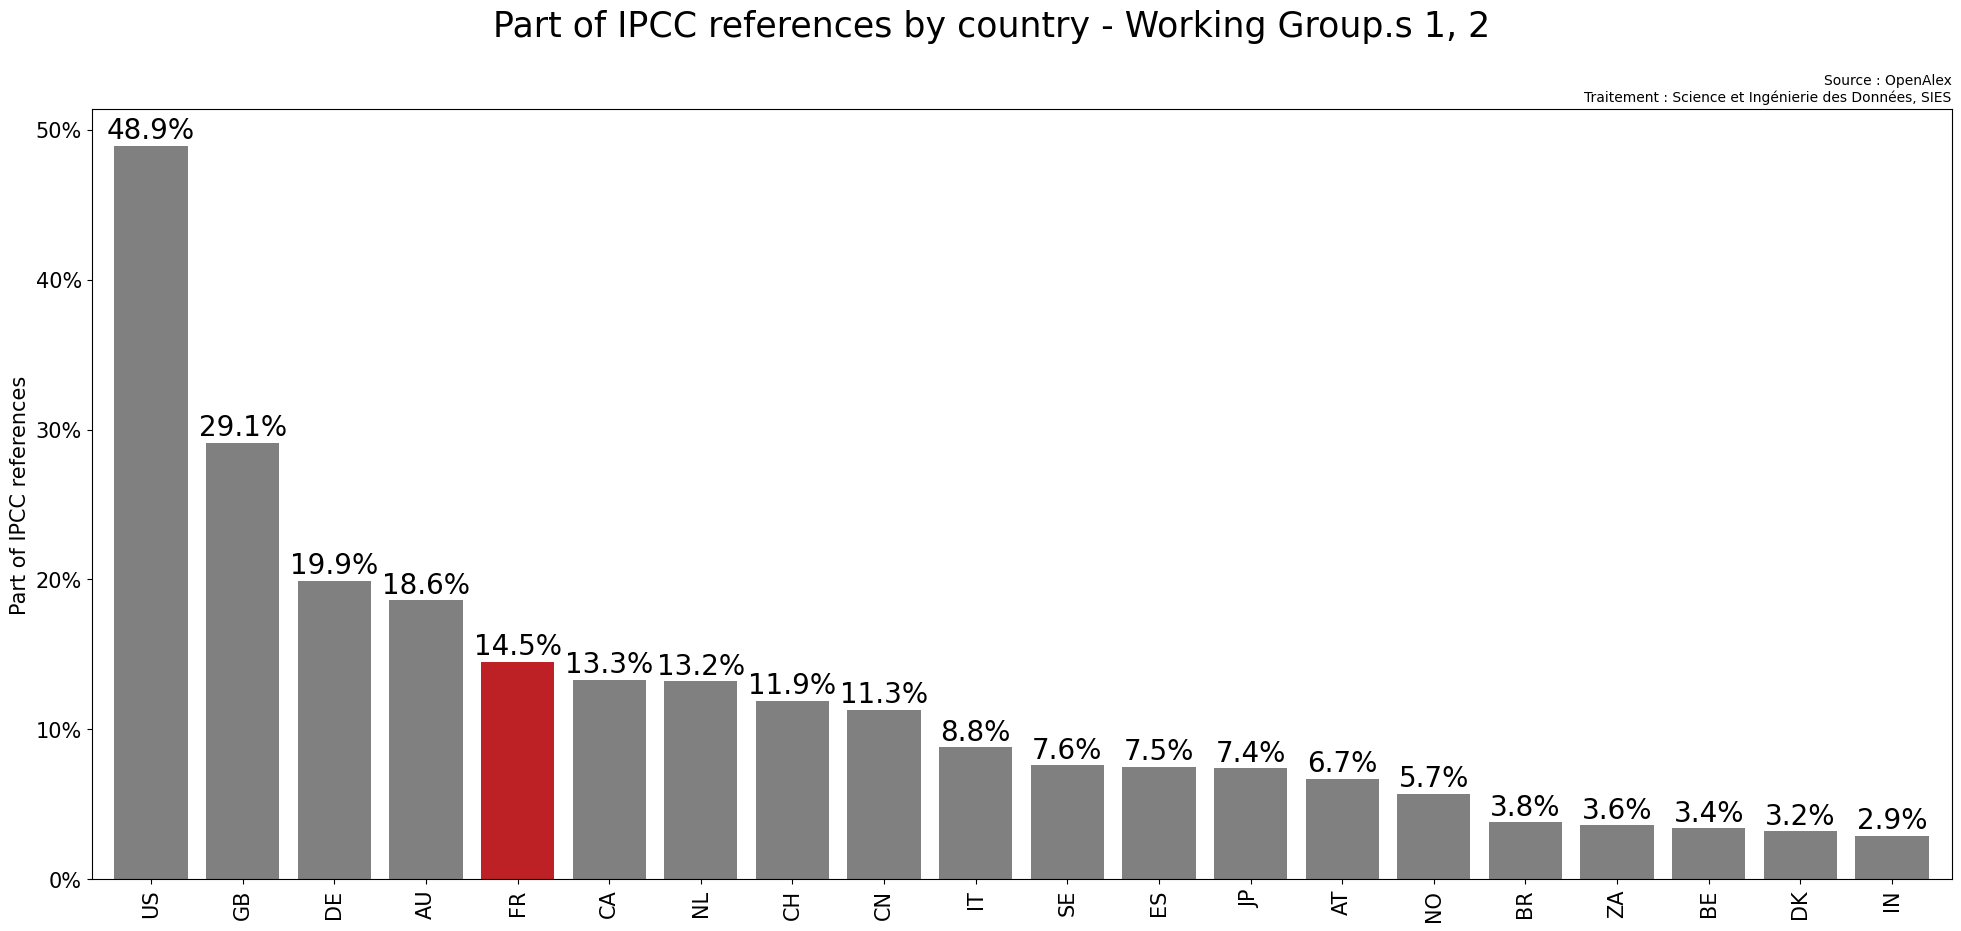

In [9]:
list_wg=["1","2"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': x}} for x in list_wg]
            }),list_wg)

Visualization of the contribution of each countries in ipcc references - french interfaces

In [10]:
interfaces_evaluation(['1','2'],'FR')

Pour la recherches aux interfaces, pour les working groups 1, 2, 
8.98 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


In [11]:
interfaces_evaluation(['1','3'],'FR')

Pour la recherches aux interfaces, pour les working groups 1, 3, 
2.26 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


In [12]:
interfaces_evaluation(['2','3'],'FR')

Pour la recherches aux interfaces, pour les working groups 2, 3, 
5.01 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


In [13]:
interfaces_evaluation(['1','2','3'],'FR')

Pour la recherches aux interfaces, pour les working groups 1, 2, 3, 
0.61 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


Visualization of the contribution of each countries in ipcc references - number of references

In [14]:
list_wg=["1","2","2_cross","3"]
get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            })

{'took': 3,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 53112, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'by_countries': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 17910,
   'buckets': [{'key': 'US', 'doc_count': 19167},
    {'key': 'GB', 'doc_count': 10499},
    {'key': 'DE', 'doc_count': 6589},
    {'key': 'AU', 'doc_count': 6085},
    {'key': 'CA', 'doc_count': 4226},
    {'key': 'CN', 'doc_count': 4053},
    {'key': 'FR', 'doc_count': 3939},
    {'key': 'NL', 'doc_count': 3745},
    {'key': 'IT', 'doc_count': 2688},
    {'key': 'CH', 'doc_count': 2670},
    {'key': 'SE', 'doc_count': 2486},
    {'key': 'ES', 'doc_count': 2468},
    {'key': 'JP', 'doc_count': 2133},
    {'key': 'NO', 'doc_count': 2083},
    {'key': 'AT', 'doc_count': 1554},
    {'key': 'BR', 'doc_count': 1493},
    {'key': 'IN', 'doc_count': 1352},
    {'key': 'ZA', 'doc_count': 1352},
    {'k

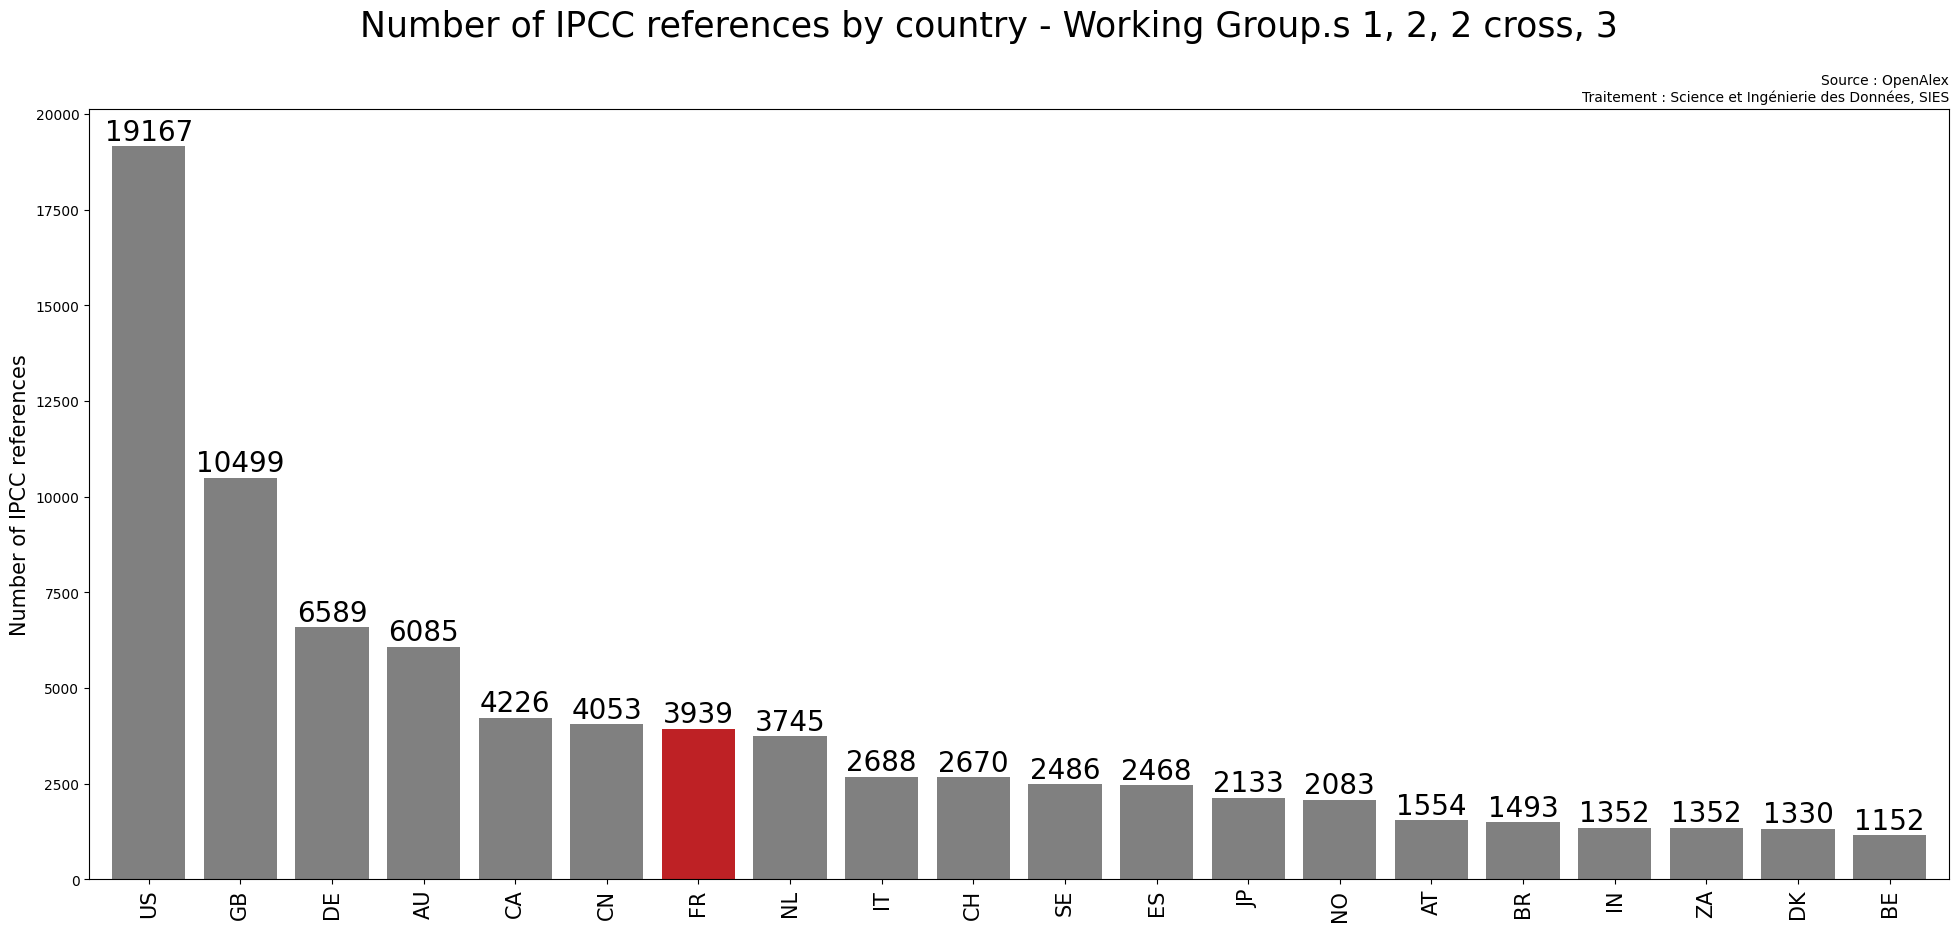

In [15]:
list_wg=["1","2","2_cross","3"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            }), list_wg, type='Number')

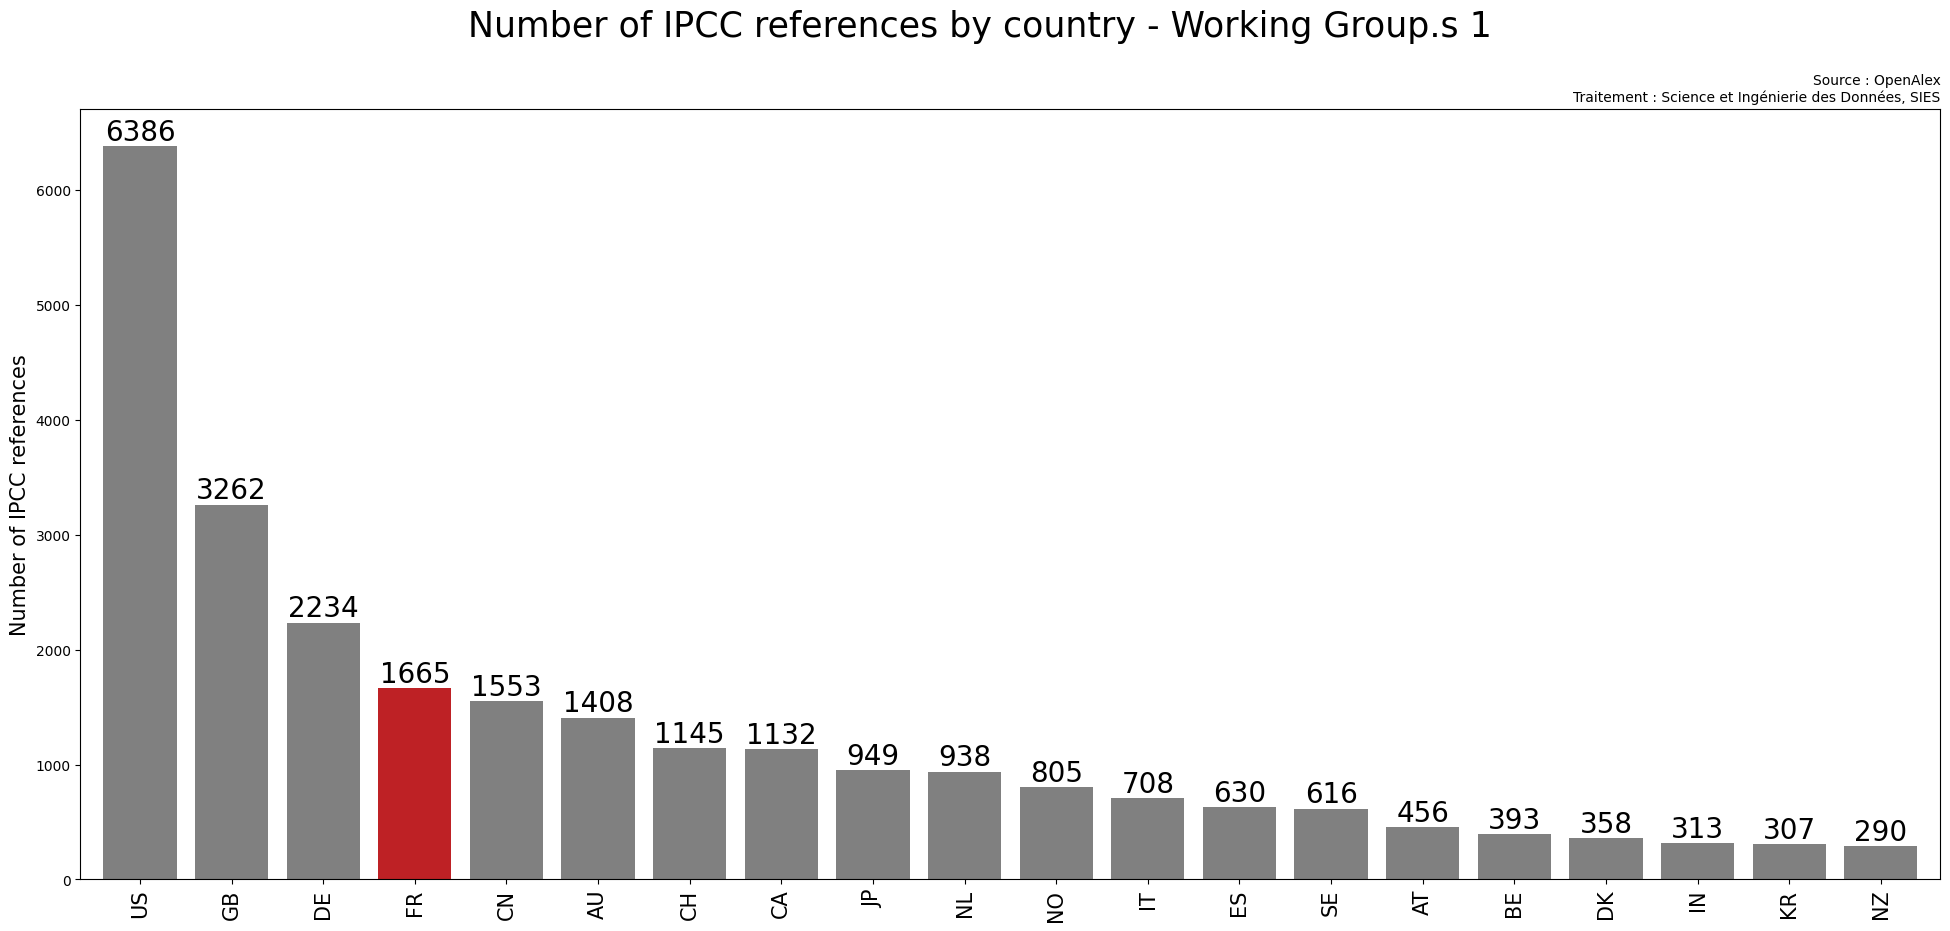

In [16]:
list_wg=["1"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

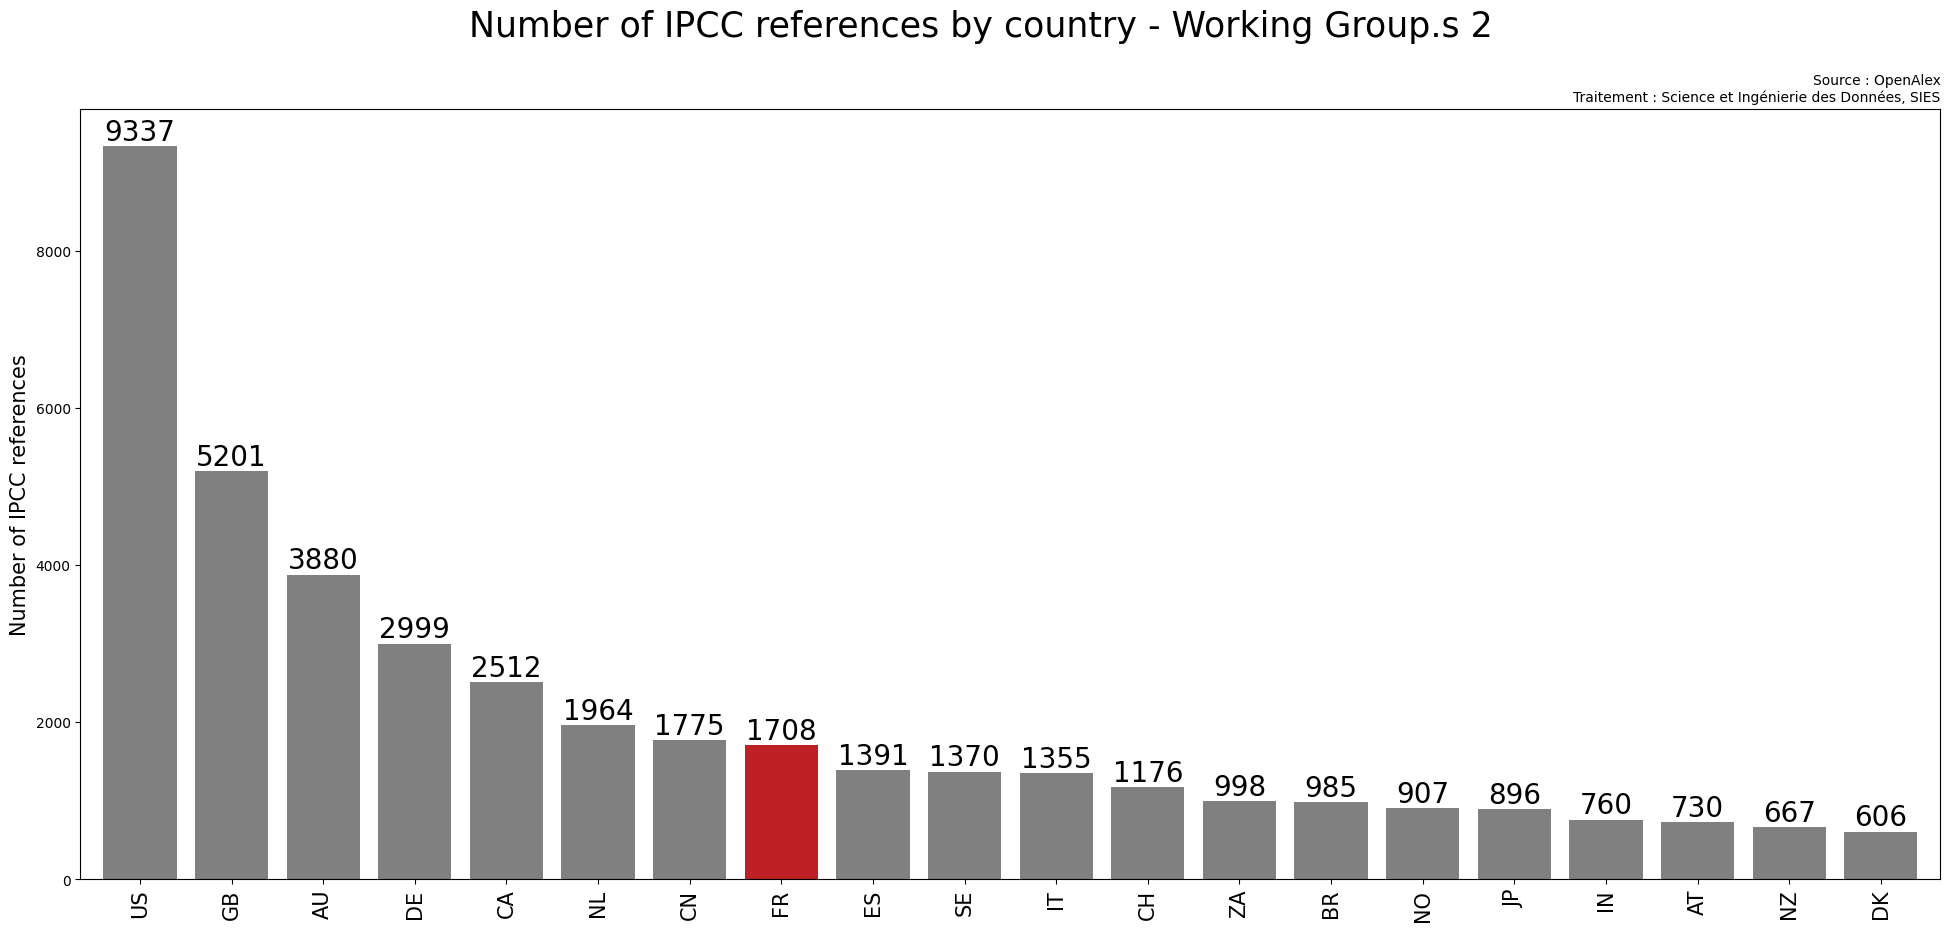

In [17]:
list_wg=["2"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

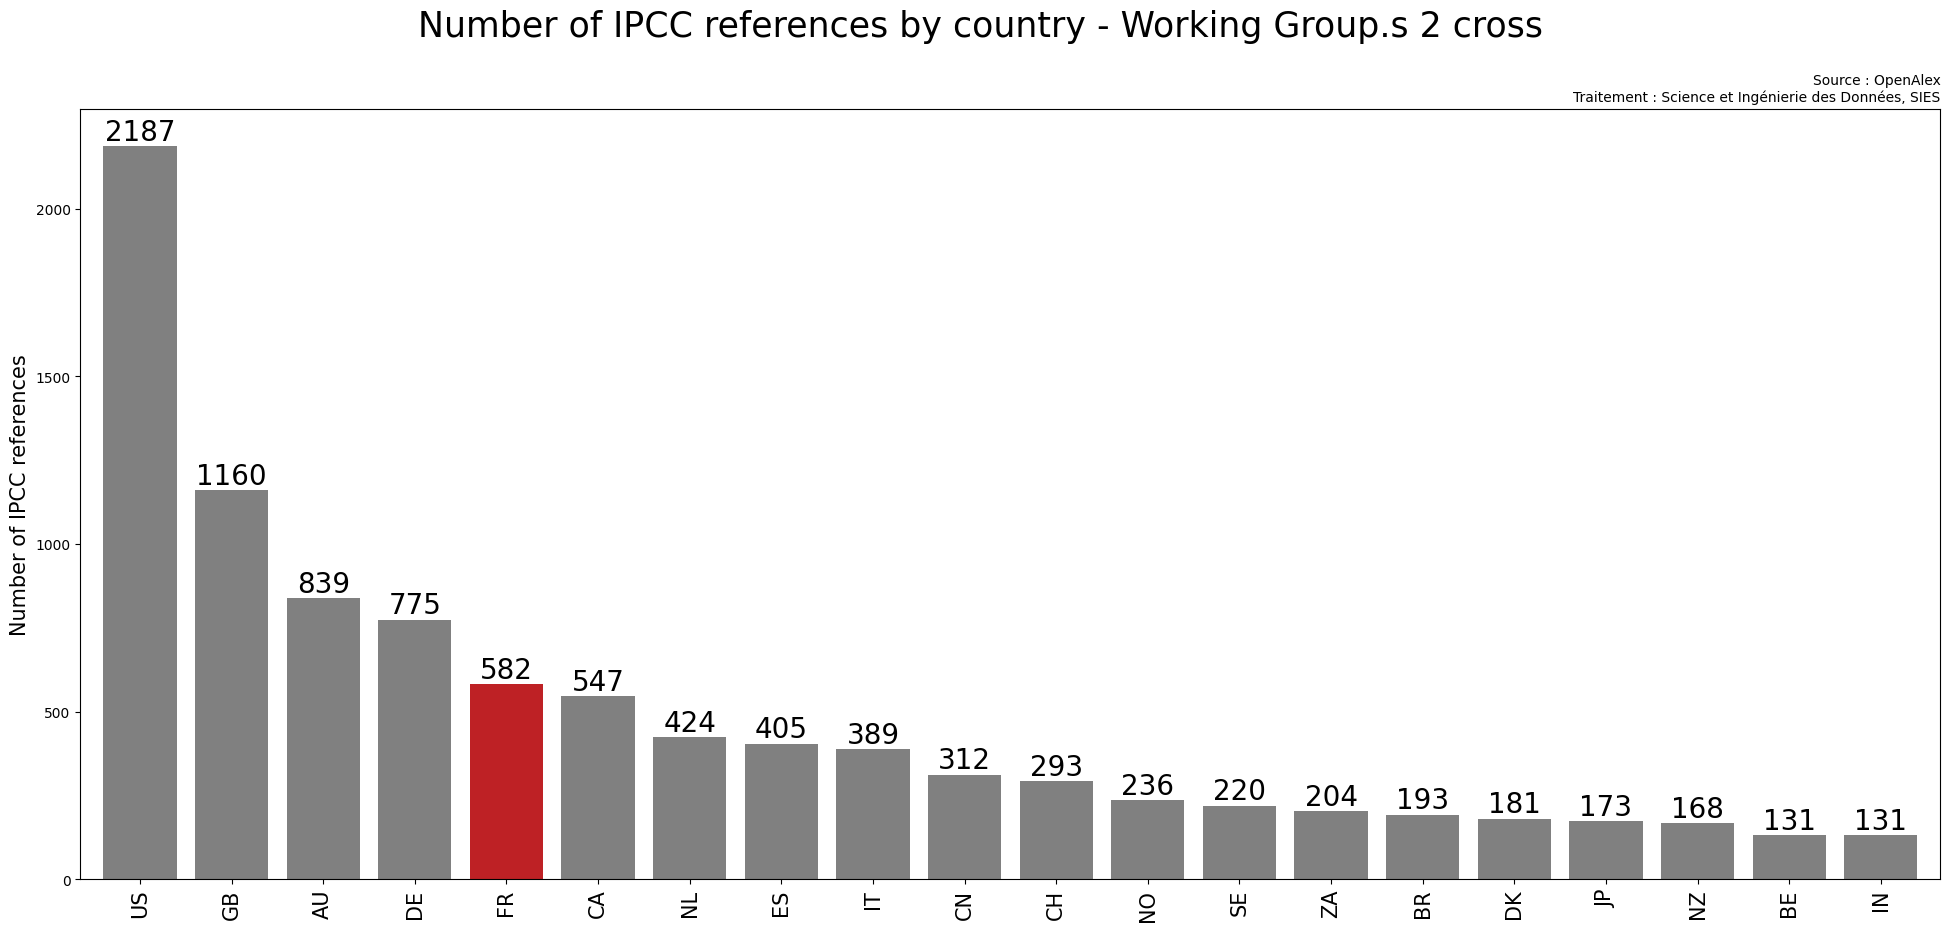

In [18]:
list_wg=["2_cross"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

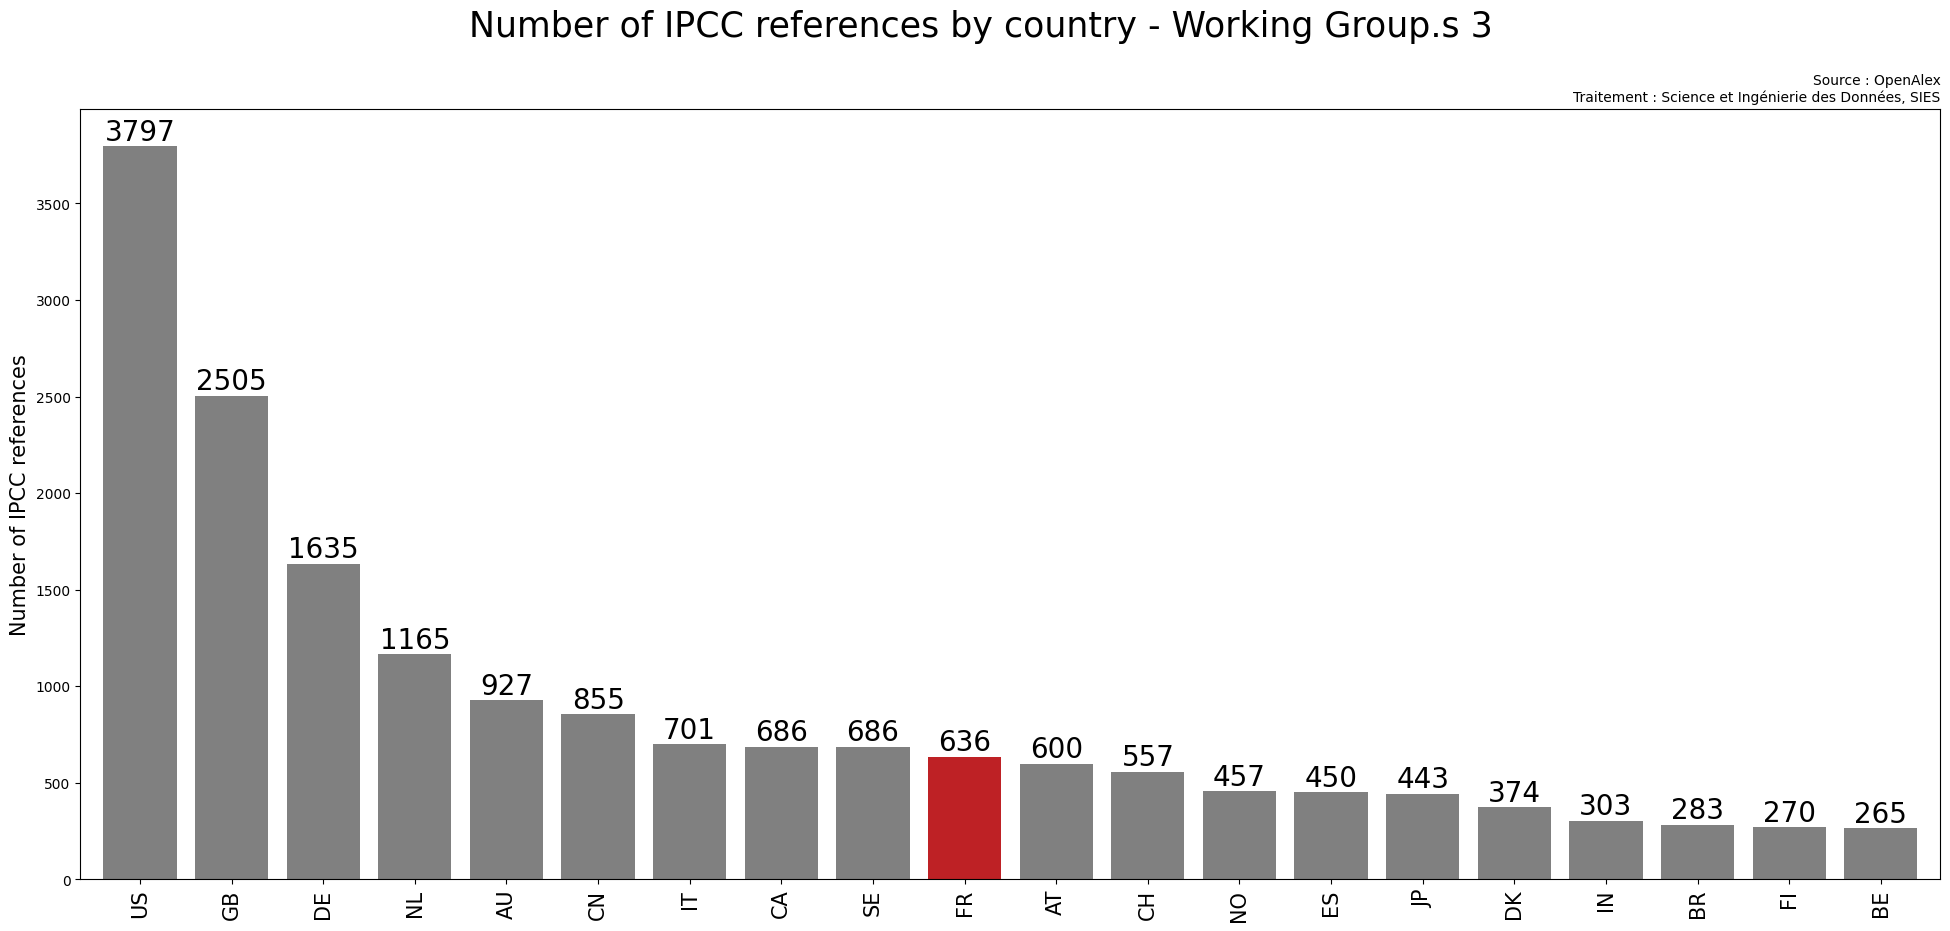

In [19]:
list_wg=["3"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

IPBES

c:\Users\haallat\Documents\teds\code_utils\elastic.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}%' for tick in ax.get_yticks()], fontsize=15)


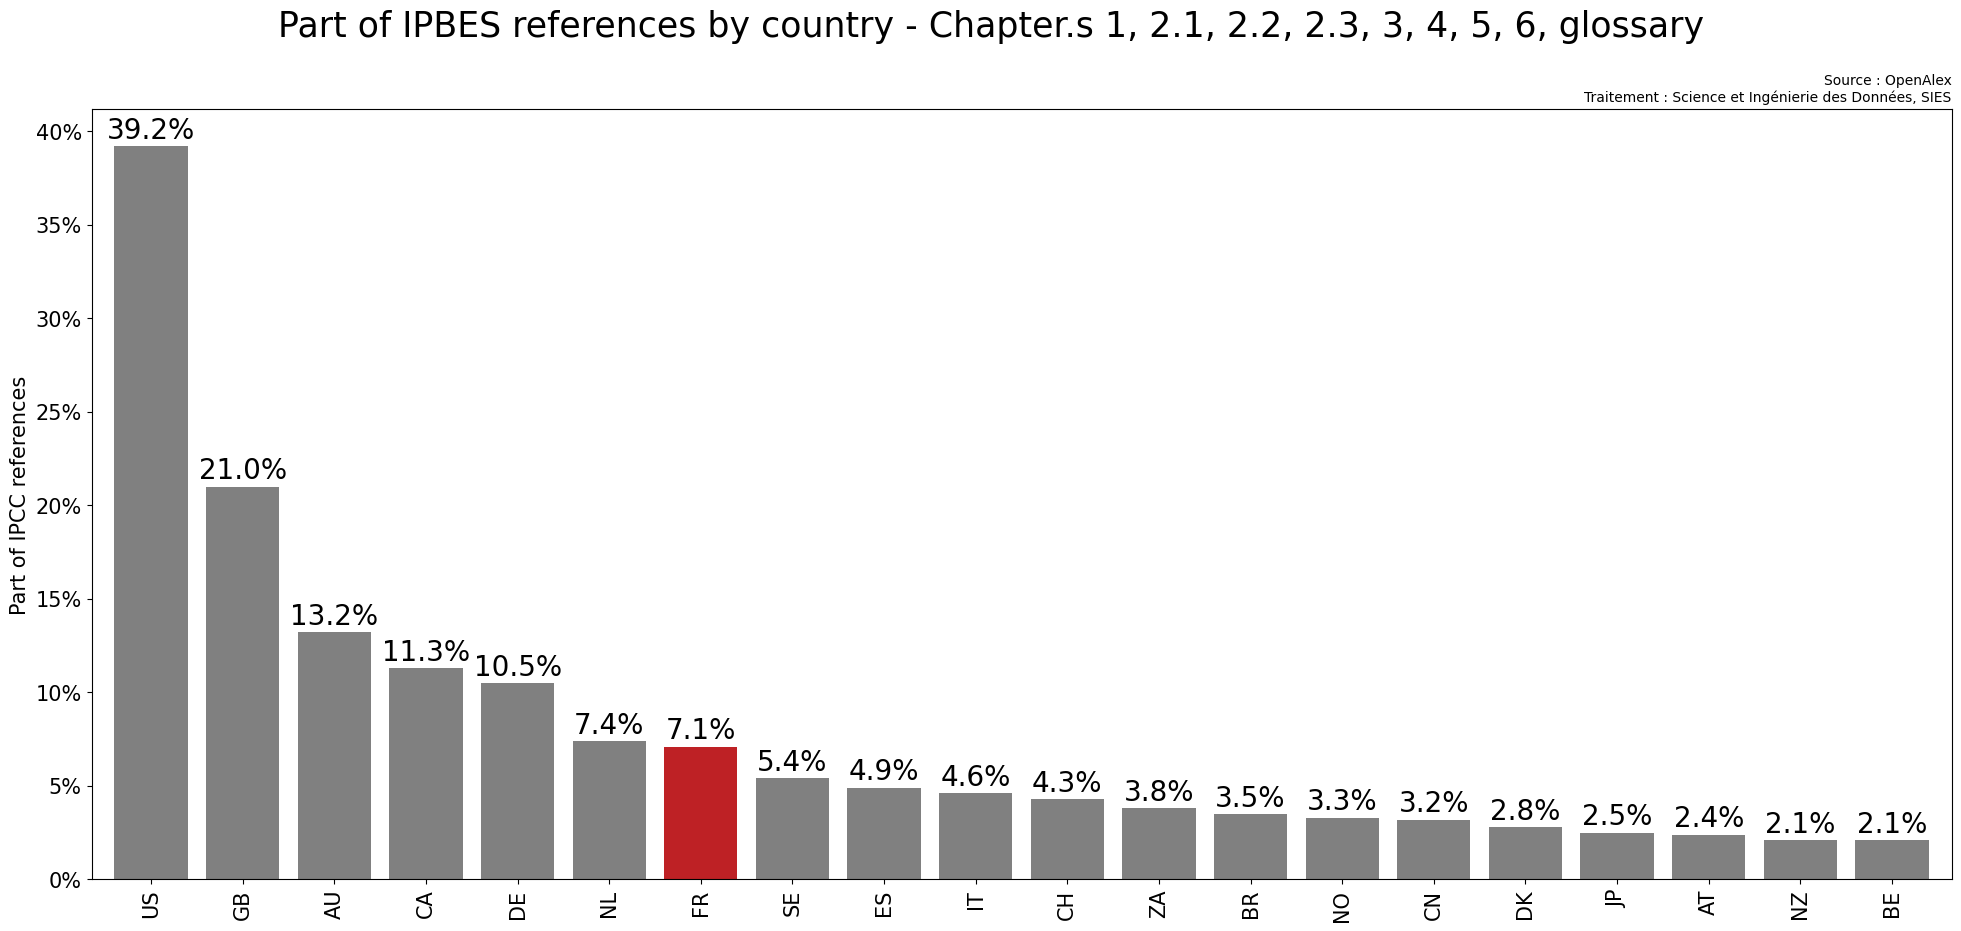

In [20]:
list_chap=["1","2.1","2.2","2.3","3","4","5","6","glossary"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipbes.chapter.keyword': x}} for x in list_chap],
                'minimum_should_match': 1
            }),list_chap, ip=['IPBES','Chapter.s'])

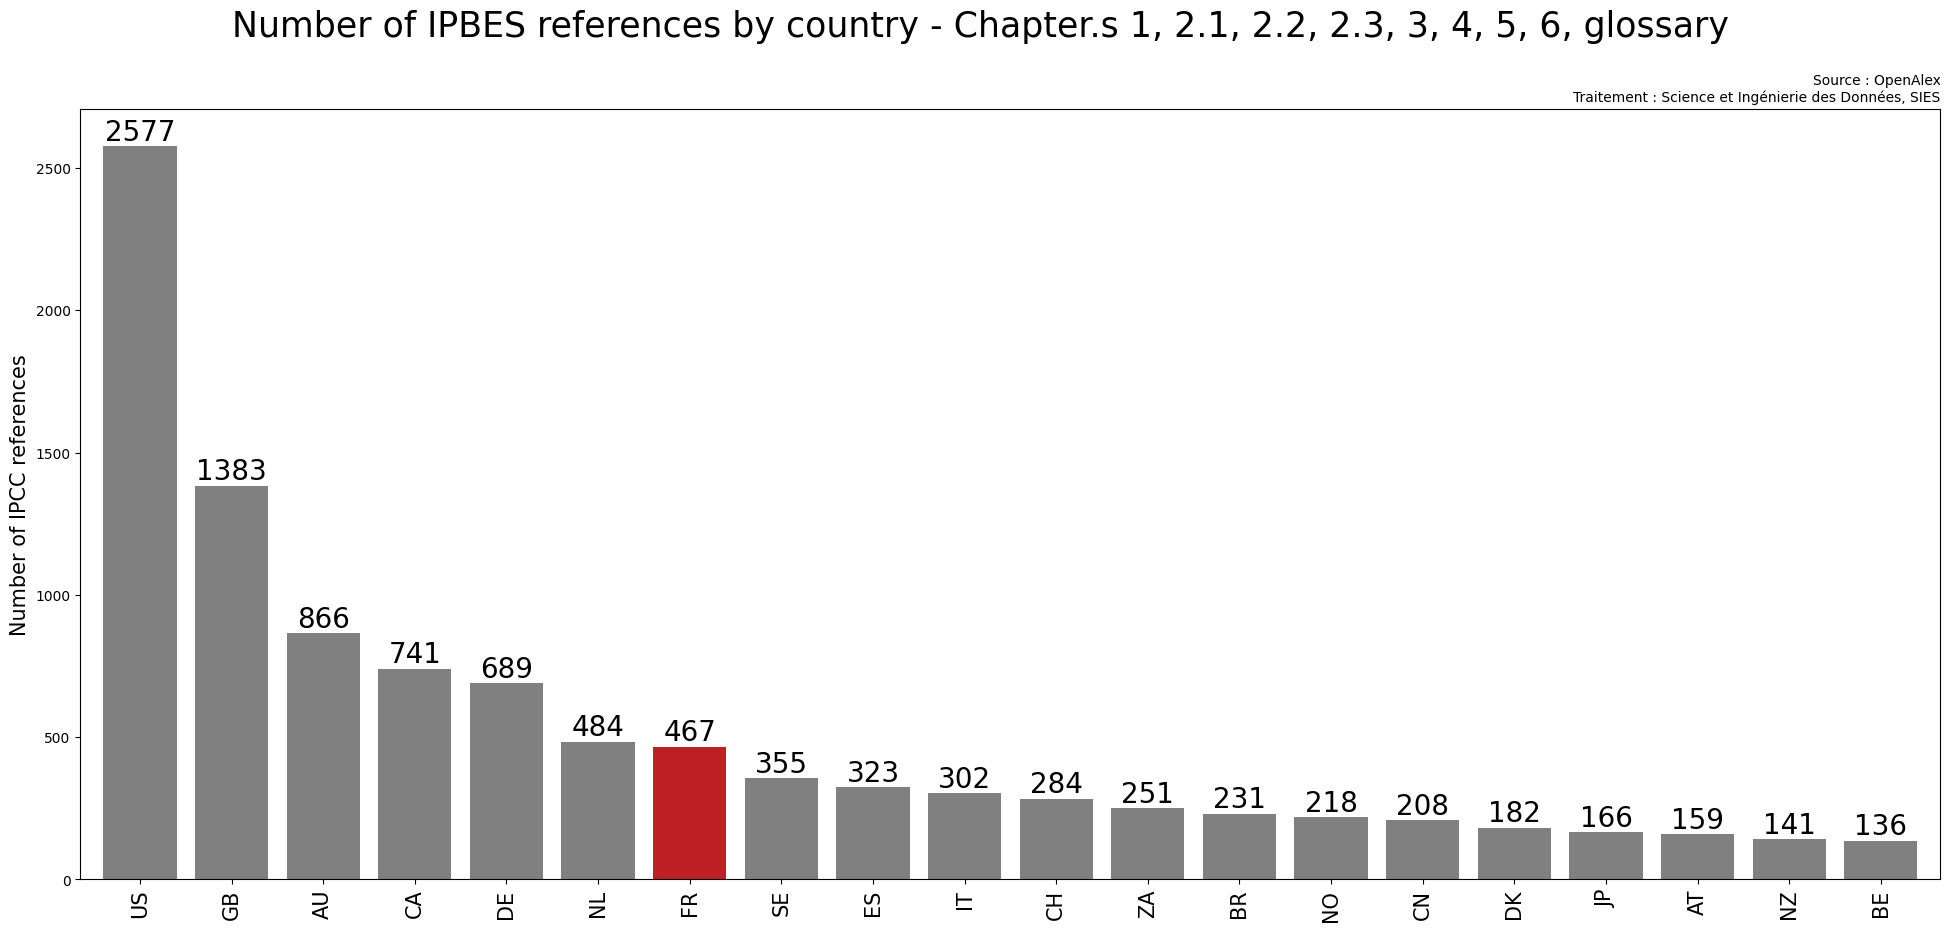

In [21]:
list_chap=["1","2.1","2.2","2.3","3","4","5","6","glossary"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipbes.chapter.keyword': x}} for x in list_chap],
                'minimum_should_match': 1
            }),list_chap, type='Number', ip=['IPBES','Chapter.s'])

repartitions

In [22]:
list_wg=["1","2","2_cross","3"]
filter1={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter2={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[1]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter2cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter3={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter12={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                        {'match': {'ipcc.wg.keyword': list_wg[1]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[2]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter12cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                        {'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter13={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                        {'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter22cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                        {'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter23={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                        {'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter32cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[2]}},
                        {'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[1]}}]
        }
filter122cross3={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}},
                     {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter122cross={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter123={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter12cross3={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[3]}},
                     {'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter22cross3={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[3]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }

In [23]:
list_colors=['#aec7e8','#042f66','#D891EF','#5865F2','#D16587','#F8B88B',"#7E354D",'#8B8000','#22CE83','#FF6700','#F62217','#FF69B4','#E238EC','#A23BEC','#F62217']

In [24]:
filters=[filter1,filter2,filter2cross,filter3,filter12,filter22cross,filter23,filter13,filter12cross,filter32cross,filter122cross3,filter122cross,filter123,filter12cross3,filter22cross3]
values=[]
for i in range(len(filters)):
    value={}
    data=get_data_from_elastic(filters[i],50)
    groups= ['US','GB','DE','FR','CN']
    tot={'US':19167,'GB':10499,'DE':6589,'FR':3939,'CN':4053}
    for x in data.get('aggregations').get('by_countries').get('buckets'):
        for k in range(len(groups)):
            if groups[k]== x.get('key'):
                value[groups[k]]=x.get('doc_count')
    ordered_value={j: round(value[j]*100/tot[j],3) if j in value else 0 for j in groups}
    values.append(list(ordered_value.values()))

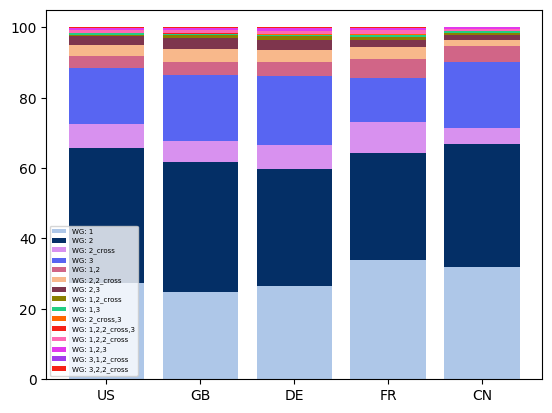

In [25]:
import matplotlib.pyplot as plt
import numpy as np

filters=[filter1,filter2,filter2cross,filter3,filter12,filter22cross,filter23,filter12cross,filter13,filter32cross,filter122cross3,filter122cross,filter123,filter12cross3,filter22cross3]
groups= ['US','GB','DE','FR','CN']
fig, ax = plt.subplots()
values_array=np.array(values)

for i in range(values_array.shape[0]):
  ax.bar(groups, values_array[i], bottom = np.sum(values_array[:i], axis = 0), color=list_colors[i], label=(f"WG: {','.join([x.get('match').get('ipcc.wg.keyword') for x in filters[i].get('must')])}"))

ax.legend(fontsize=5)
plt.show() 

In [26]:
values[:7]

[[27.433, 24.717, 26.605, 33.765, 31.927],
 [38.159, 37.07, 33.177, 30.465, 35.011],
 [6.798, 5.772, 6.647, 8.86, 4.54],
 [16.012, 18.83, 19.639, 12.49, 18.678],
 [3.553, 3.81, 4.128, 5.331, 4.392],
 [3.047, 3.543, 3.278, 3.554, 1.9],
 [2.384, 3.315, 3.005, 2.006, 1.48]]

In [27]:
wg_simple=list(map(sum, zip(*values[:7])))

In [28]:
wg_simple

[97.386, 97.057, 96.479, 96.471, 97.92800000000001]

In [29]:
values_simple=values[:7]+[[100 - wg_simple[i] for i in range(len(wg_simple))]]

C:\Users\haallat\AppData\Local\Temp\ipykernel_12140\2325913052.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, size=10)
C:\Users\haallat\AppData\Local\Temp\ipykernel_12140\2325913052.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=10)


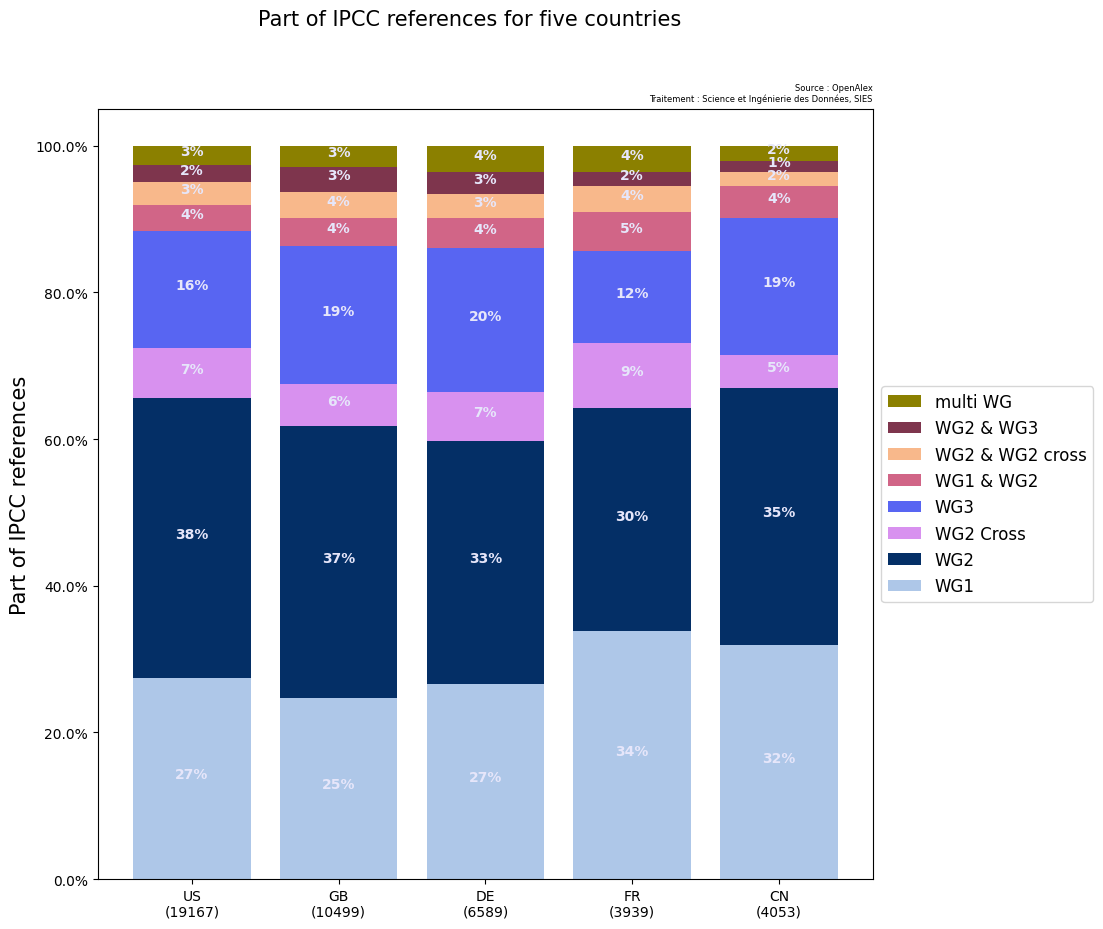

In [30]:
import matplotlib.pyplot as plt
import numpy as np

groups= ['US','GB','DE','FR','CN']
fig, ax = plt.subplots(figsize=(10, 10))
values_array=np.array(values_simple)
labels=['WG1','WG2','WG2 Cross','WG3','WG1 & WG2','WG2 & WG2 cross','WG2 & WG3','multi WG']
tot={'US':19167,'GB':10499,'DE':6589,'FR':3939,'CN':4053}

for i in range(values_array.shape[0]):
  ax.bar(groups, values_array[i], bottom = np.sum(values_array[:i], axis = 0), color=list_colors[i], label=labels[i])

i=0
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          f'{bar.get_height():.0f}%', ha = 'center',
          color = 'lavender', weight = 'bold', size = 10) 
  i+=1

plt.suptitle(f"Part of IPCC references for five countries ", size=15)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=6, loc='right')

x_labels = [f"{groups[i]}\n({list(tot.values())[i]})" for i in range(len(groups))]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(x_labels, size=10)
ax.set_yticklabels([f'{tick:.1f}%' for tick in ax.get_yticks()], fontsize=10)
ax.set_ylabel(f'Part of IPCC references', fontsize=15)

plt.show() 

Time repartition

In [2]:
df_ipcc=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\data_ipcc_model2.json')
df_ipbes=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\data_ipbes_visualization2.json')

In [3]:
df_ipcc_fr=df_ipcc.drop_duplicates(subset=['doi']).explode('countries')[df_ipcc.drop_duplicates(subset=['doi']).explode('countries').countries=='FR']
df_ipcc_fr['year']=df_ipcc_fr.loc[:,'year'].apply(lambda x: get_year_ipcc(x))

In [36]:
df_ipbes_fr=df_ipbes.drop_duplicates(subset=['doi']).explode('countries')[df_ipbes.drop_duplicates(subset=['doi']).explode('countries').countries=='FR']
df_ipbes_fr['year']=df_ipbes_fr['date'].apply(lambda x: get_year_ipbes(x))

In [54]:
#utiliser la base elastic
import os
from dotenv import load_dotenv
load_dotenv()
import requests
import base64
from elasticsearch import Elasticsearch
from urllib import parse
import pandas as pd
import matplotlib.pyplot as plt

passw = f"{os.getenv('ES_LOGIN_TEDS_BACK')}:{os.getenv('ES_PASSWORD_TEDS_BACK')}"
base64_bytes = passw.encode('ascii')
message_bytes = base64.b64encode(base64_bytes)
token = message_bytes.decode('ascii')
url = os.getenv('ES_URL')+'teds-bibliography/_search'

def get_from_es(body):
    return requests.post(url, json=body, headers={f'Authorization': f'Basic {token}'}).json()


body = {
        'size': 0,
        'query': {
            'bool': {
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            },
            },
            'aggs': {
                'by_countries': {
                    'terms': {
                        'field': 'year.keyword', 'size': 30
                    },
                }
            },
            'track_total_hits': True
        }
res = get_from_es(body)


In [55]:
res

{'took': 247,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 53112, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'by_countries': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': []}}}

In [37]:
list_years=[1686,1800,1900,1950,1980,2000,2010,2013]
#[2013,2014,2015,2016,2018,2019,2020,2021,2022,2023]

In [38]:
def years(year):
    for i in range(len(list_years)-1):
        if int(year) in list(range(list_years[i],list_years[i+1])):
            return f"{list_years[i]}-{list_years[i+1]-1}"
    else:
        return str(year)

In [39]:
list_years_ipcc=[]
list_years_ipbes=[]
for year in list(df_ipcc_fr.loc[:,'year']):
    try:
        list_years_ipcc.append(years(year))
    except:
        list_years_ipcc.append(None)
for year in list(df_ipbes_fr.loc[:,'year']):
    try:
        list_years_ipbes.append(years(year))
    except:
        list_years_ipbes.append(None)

In [40]:
df_ipcc_fr['years']=None
df_ipbes_fr['years']=None

In [41]:
df_ipcc_fr['years']=list_years_ipcc
df_ipbes_fr['years']=list_years_ipbes

In [42]:
data_counts=df_ipcc_fr.years.apply(lambda x: int(x) if isinstance(x,float) else x).value_counts()

C:\Users\haallat\AppData\Local\Temp\ipykernel_12140\197088736.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)


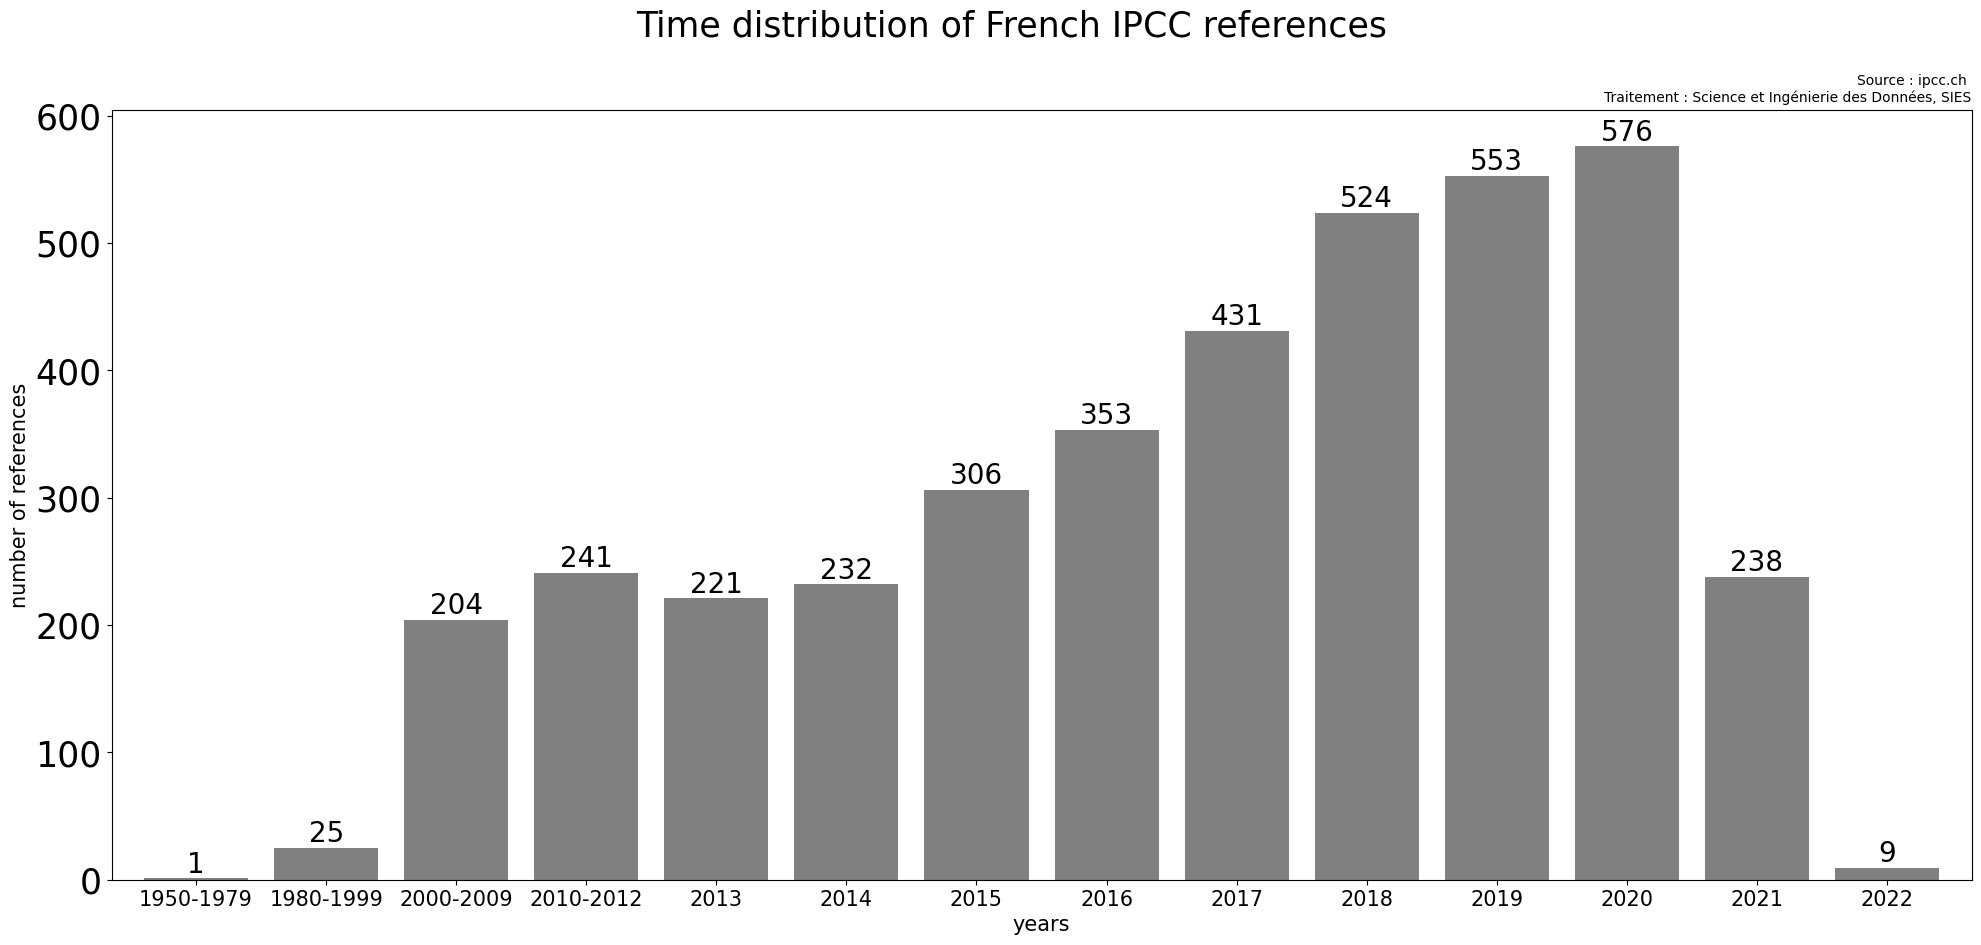

In [48]:
import matplotlib.pyplot as plt

data_counts=df_ipcc_fr.years.apply(lambda x: int(x) if isinstance(x,float) else x).value_counts()
data_counts=pd.Series(dict(data_counts[:20])).sort_index()
plt.figure(figsize=(24, 10))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle("Time distribution of French IPCC references", size=25)
plt.title('Source : ipcc.ch \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xticklabels(data_counts.index[:20], rotation='horizontal', fontsize=15)
ax.set_ylabel(f'number of references', fontsize=15)
ax.set_xlabel(f'years', fontsize=15)
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_12140\1859060620.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


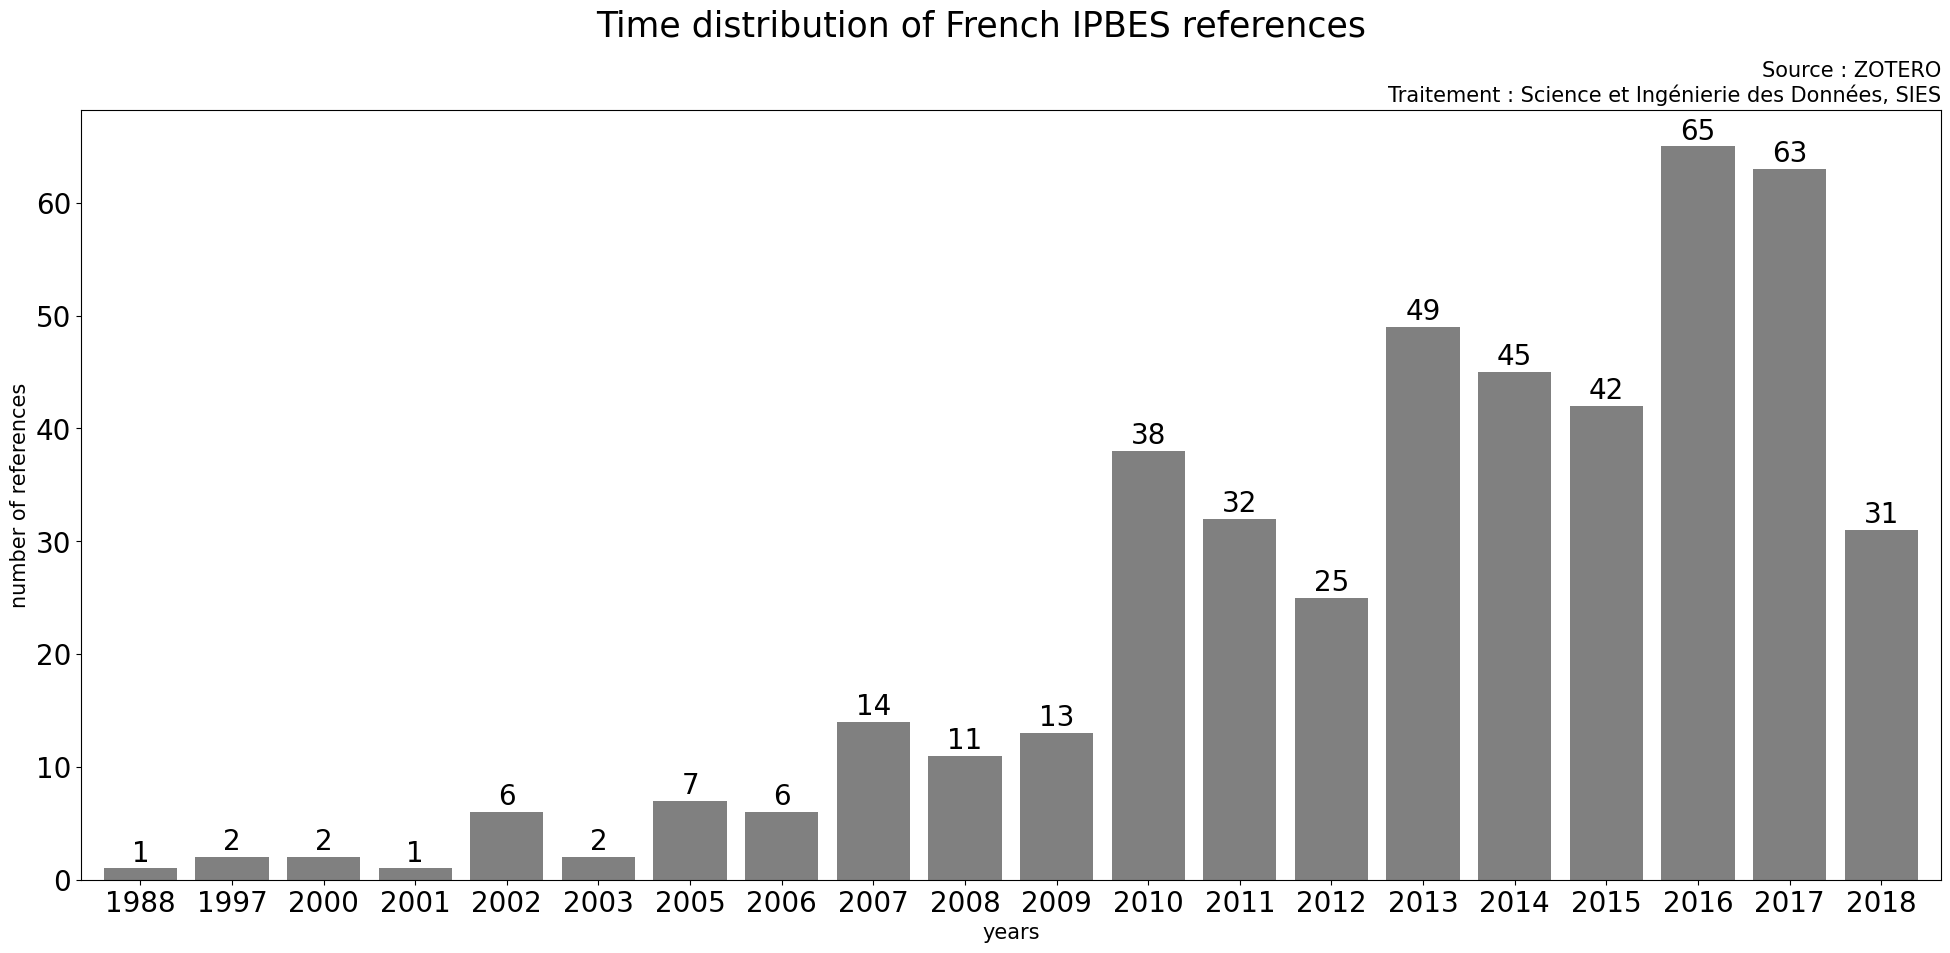

In [49]:
import matplotlib.pyplot as plt

data_counts=df_ipbes_fr.year.value_counts()
data_counts=pd.Series(dict(data_counts[:20])).sort_index()
plt.figure(figsize=(24, 10))
color_dict = {
'FR': '#BE2125'
}
ax = data_counts[:20].plot(kind='bar', color=[color_dict.get(u, 'grey') for u in data_counts[:20].index], width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=20)
    
plt.suptitle(f"Time distribution of French IPBES references", size=25)
plt.title('Source : ZOTERO\nTraitement : Science et Ingénierie des Données, SIES', size=15, loc='right')

ax.set_xticklabels(data_counts.index[:20], rotation='horizontal', fontsize=20)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_ylabel(f'number of references', fontsize=15)
ax.set_xlabel(f'years', fontsize=15)
plt.show()

top persons

In [4]:
persons_fr=[x for x in aplatir(list(df_ipcc.authors_name)) if x and 'FR' in list(x.values())[0]]

In [5]:
pd.Series([list(y.keys())[0] for y in persons_fr]).value_counts()

Philippe Ciais         236
Robert Vautard         104
Laurent Bopp            90
Oliviér Boucher         63
Roland Séférian         54
                      ... 
Gilles Hunault           1
Patrice Cannavo          1
François Nold            1
Christophe Schwartz      1
Jean-Marc Millot         1
Name: count, Length: 4847, dtype: int64

C:\Users\haallat\AppData\Local\Temp\ipykernel_15008\2025632965.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)


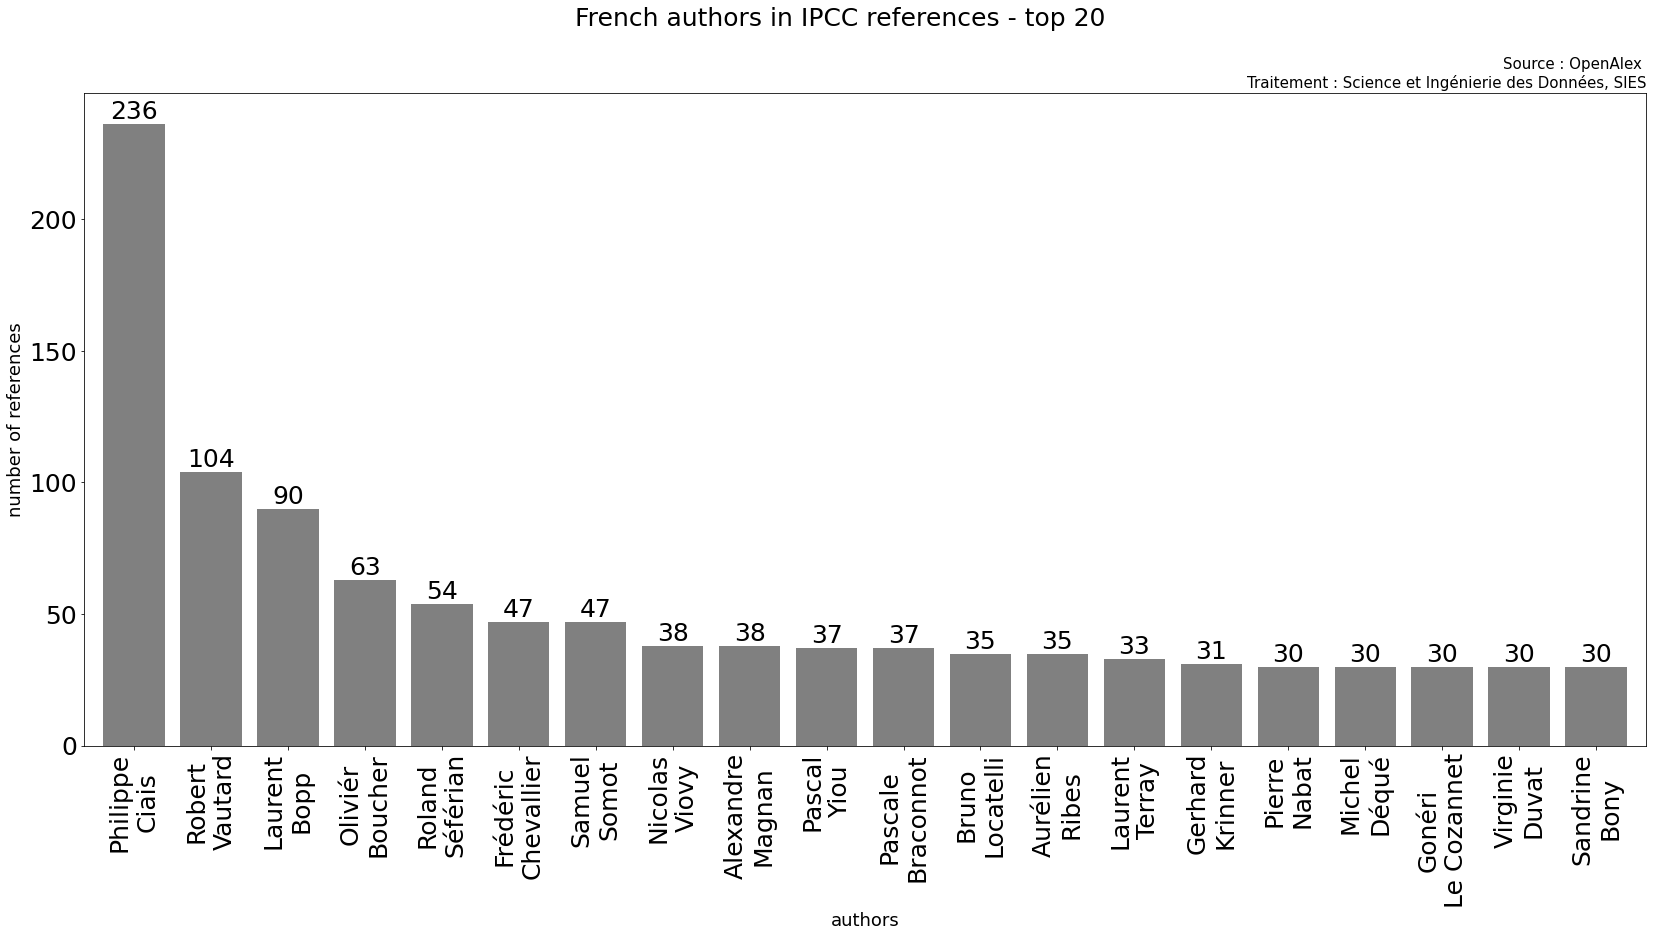

In [7]:
import matplotlib.pyplot as plt

data_counts=pd.Series([list(y.keys())[0] for y in persons_fr]).value_counts()
plt.figure(figsize=(28, 12))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=25)
    
plt.suptitle("French authors in IPCC references - top 20", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=15, loc='right')

xticklabels = [label.split(' ', 1)[0]+'\n'+label.split(' ', 1)[1] for label in data_counts.index[:20]]
ax.set_xticklabels(xticklabels, rotation='vertical', fontsize=25)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xlabel(f'authors', fontsize=18)
ax.set_ylabel(f'number of references', fontsize=18)
plt.show()

In [ ]:
persons_fr=[x for x in aplatir(list(df_ipbes.authors_name)) if x and 'FR' in list(x.values())[0]]

In [ ]:
import matplotlib.pyplot as plt

data_counts=pd.Series([list(y.keys())[0] for y in persons_fr]).value_counts()
plt.figure(figsize=(28, 12))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=25)
    
plt.suptitle("French authors in IPBES references - top 20", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=15, loc='right')

xticklabels = [label.split(' ', 1)[0]+'\n'+label.split(' ', 1)[1] for label in data_counts.index[:20]]
ax.set_xticklabels(xticklabels, rotation='vertical', fontsize=25)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xlabel(f'authors', fontsize=18)
ax.set_ylabel(f'number of references', fontsize=18)
plt.show()

top labo

In [8]:
structures_ipcc=[ i for j in [ y for x in list(df_ipcc[df_ipcc.loc[:,'rors'].apply(lambda x: x[0]!=None)].rors) for y in x] for i in j ]
rors_labo_et_institutions=[list(y.keys())[0] for y in [x for x in structures_ipcc if x and 'FR' in list(x.values())]]

In [9]:
structures_ipbes=[ i for j in [ y for x in list(df_ipbes[df_ipbes.loc[:,'rors'].apply(lambda x: x[0]!=None)].rors) for y in x] for i in j ]
rors_labo_et_institutions=[list(y.keys())[0] for y in [x for x in structures_ipbes if x and 'FR' in list(x.values())]]

In [10]:
struct_paysage=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\fr_esr_paysage_structures_all.json')
ror_rnsr_paysage=struct_paysage[['uo_lib','element_ror','identifiant_rnsr']].dropna(subset=['identifiant_rnsr']).rename(columns={'element_ror':'ror'})

In [11]:
ipcc_labo=pd.merge(pd.DataFrame(data={'ror':rors_labo_et_institutions}),ror_rnsr_paysage,how='inner',on='ror')

In [12]:
ipcc_labo.uo_lib.value_counts()

uo_lib
Laboratoire des sciences du climat et de l'environnement                 120
Centre d'écologie fonctionnelle et évolutive                              67
Laboratoire d'écologie alpine                                             63
Écologie, systématique et évolution                                       47
Centre pour la biodiversité marine, l'exploitation et la conservation     37
                                                                        ... 
Centre d'études de l'Inde et de l'Asie du sud                              1
Microbiologie de l'alimentation au service de la santé                     1
Bureau d'économie théorique et appliquée                                   1
Archéologie et histoire ancienne : Méditerranée et Europe                  1
Fondation française pour la recherche sur la biodiversité                  1
Name: count, Length: 62, dtype: int64

C:\Users\haallat\AppData\Local\Temp\ipykernel_15008\2510946317.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)


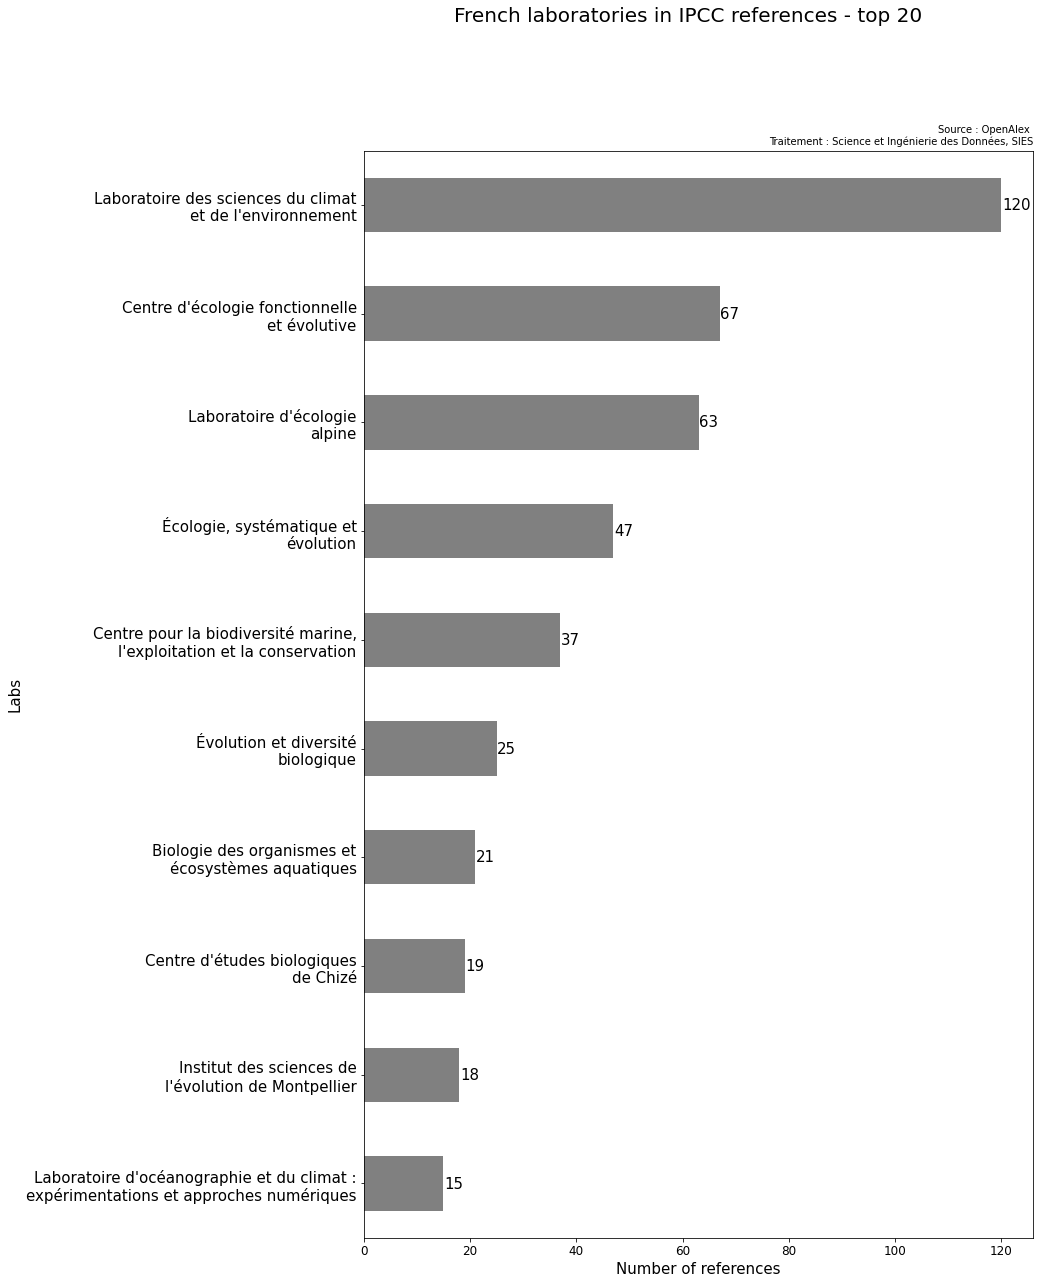

In [17]:
import matplotlib.pyplot as plt

data_counts = ipcc_labo.uo_lib.value_counts()
plt.figure(figsize=(12, 20))  
ax = data_counts[:10].plot(kind='barh', color='grey')  

for i, v in enumerate(data_counts[:10]):
    ax.text(v + 0.1, i, f'{v}', ha='left', va='center', color='black', size=15)  

plt.suptitle("French laboratories in IPCC references - top 20", size=20)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

yticklabels = [' '.join(label.split(' ')[:len(label.split(' '))//2 + 1])+'\n'+' '.join(label.split(' ')[len(label.split(' '))//2 +1:]) for label in data_counts.index[:10]]
ax.set_yticklabels(yticklabels, fontsize=15)  
ax.set_xticklabels([f'{tick:.0f}' for tick in ax.get_xticks()], fontsize=12)  
ax.set_xlabel('Number of references', fontsize=15)  
ax.set_ylabel('Labs', fontsize=15)  
plt.gca().invert_yaxis()  
plt.show()

C:\Users\haallat\AppData\Local\Temp\ipykernel_15008\3640958764.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)


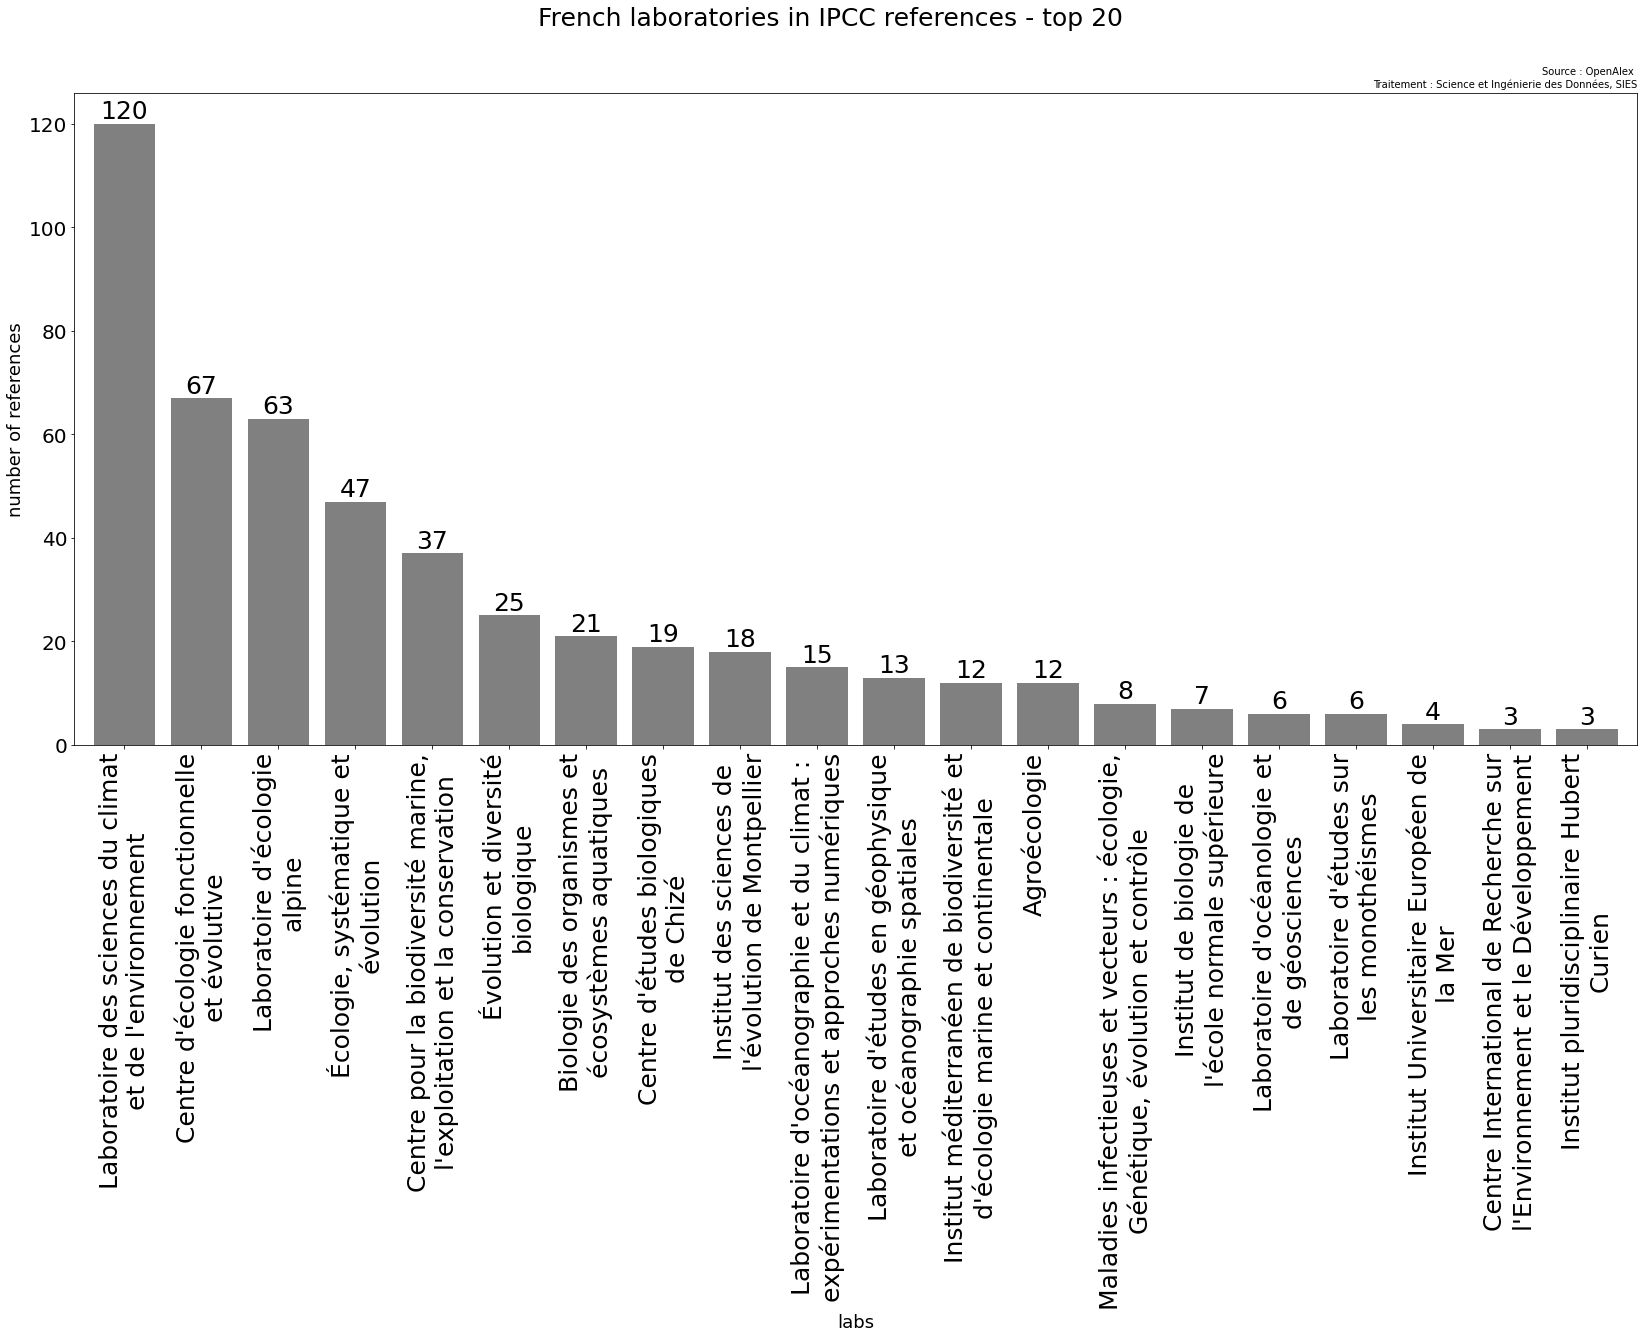

In [18]:
import matplotlib.pyplot as plt

data_counts=ipcc_labo.uo_lib.value_counts()
plt.figure(figsize=(28, 12))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=25)
    
plt.suptitle("French laboratories in IPCC references - top 20", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

xticklabels = [' '.join(label.split(' ')[:len(label.split(' '))//2 + 1])+'\n'+' '.join(label.split(' ')[len(label.split(' '))//2 +1:]) for label in data_counts.index[:20]]
ax.set_xticklabels(xticklabels, rotation='vertical', fontsize=25)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=20)
ax.set_xlabel(f'labs', fontsize=18)
ax.set_ylabel(f'number of references', fontsize=18)
plt.show()

top institutions

In [ ]:
ror_rnsr_paysage=struct_paysage[['element_ror','identifiant_rnsr']].dropna(subset=['identifiant_rnsr']).rename(columns={'element_ror':'ror'})
ror_rnsr_paysage.loc[:,'ror']=ror_rnsr_paysage.loc[:,'ror'].apply(lambda x: str(x).replace('https://ror.org/','') if pd.isna(x)==False else None)

In [ ]:
df_rnsr=pd.merge(pd.DataFrame(data={'ror':[str(x).replace('https://ror.org/','') for x in rors_labo_et_institutions]}),ror_rnsr_paysage.dropna(subset=['ror']).rename(columns={'identifiant_rnsr':'rnsr'}), on='ror', how='left')

In [ ]:
rnsr_tutelles_scanr=pd.read_json(module_path+'\\IPCC_bibliography\\AR6\\structured_data\\organizations.jsonl', lines=True)
rnsr_tutelles_scanr['tutelles_label']=rnsr_tutelles_scanr['institutions'].apply(lambda x: [y.get('label') for y in x] if len(x)>0 else None)
rnsr_tutelles_scanr['tutelles_id']=rnsr_tutelles_scanr['institutions'].apply(lambda x: [y.get('structure') for y in x] if len(x)>0 else None)
rnsr_tutelles_scanr.loc[:,'ror']=rnsr_tutelles_scanr.loc[:,'externalIds'].apply(lambda y: [x.get('id') for x in y if x.get('type')=='ROR'])
rnsr_tutelles_scanr.loc[:,'rnsr']=rnsr_tutelles_scanr.loc[:,'externalIds'].apply(lambda y: [x.get('id') for x in y if x.get('type')=='rnsr'])
rnsr_tutelles=rnsr_tutelles_scanr[['id','tutelles_label']].rename(columns={'id':'rnsr'})
ror_tutelles=rnsr_tutelles_scanr[['ror','tutelles_label']].explode('ror')

In [ ]:
rnsr_tutelles_scanr.columns

In [ ]:
rnsr_tutelles[['rnsr','tutelles_label']].dropna(subset=['rnsr'])

In [ ]:
ror_tutelles[['ror','tutelles_label']].dropna(subset=['ror'])

In [ ]:
df_test=pd.merge(df_rnsr,ror_tutelles.rename(columns={'tutelles_label':'tutelles_ror'}).dropna(subset=['ror']), on='ror', how='left')
df_test2=pd.merge(df_test,rnsr_tutelles.rename(columns={'tutelles_label':'tutelles_rnsr'}).dropna(subset=['rnsr']), on='rnsr', how='left')

In [ ]:
def get_tutelles(row):
    if isinstance(row['tutelles_ror'],list) and len(row['tutelles_ror'])>0:
        return row['tutelles_ror']
    elif isinstance(row['tutelles_rnsr'],list) and len(row['tutelles_rnsr'])>0:
        return row['tutelles_rnsr']
    else:
        return None

In [ ]:
df_test2['tutelles']=df_test2.apply(lambda row: get_tutelles(row), axis=1)

In [ ]:
df_test3=df_test2.explode('tutelles')

In [ ]:
df_test3.tutelles.value_counts()

In [ ]:
import matplotlib.pyplot as plt

data_counts=df_test3.tutelles.value_counts()
plt.figure(figsize=(28, 12))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=25)
    
plt.suptitle("Institutions of French IPBES references - top 20", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

xticklabels = [' '.join(label.split(' ')[:len(label.split(' '))//2 + 1])+'\n'+' '.join(label.split(' ')[len(label.split(' '))//2 +1:]) for label in data_counts.index[:20]]
ax.set_xticklabels(xticklabels, rotation='vertical', fontsize=20)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xlabel(f'institutions', fontsize=18)
ax.set_ylabel(f'number of references', fontsize=18)
plt.show()

journaux

In [ ]:
df_ipbes_fr.explode('locations_names').locations_names.value_counts()

In [ ]:
import matplotlib.pyplot as plt

data_counts=df_ipbes_fr.explode('locations_names').locations_names.value_counts()
plt.figure(figsize=(28, 12))
ax = data_counts[:20].plot(kind='bar', color='grey', width=0.8)

for i, v in enumerate(data_counts[:20]):
    ax.text(i, v + 0.1, f'{v}', ha='center', va='bottom', color='black', size=25)
    
plt.suptitle("Scientific papers of French IPBES references - top 20", size=25)
plt.title('Source : OpenAlex \nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')

xticklabels = [' '.join(label.split(' ')[:len(label.split(' '))//2 + 1])+'\n'+' '.join(label.split(' ')[len(label.split(' '))//2 +1:]) for label in data_counts.index[:20]]
ax.set_xticklabels(xticklabels, rotation='vertical', fontsize=20)
ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=25)
ax.set_xlabel(f'papers', fontsize=18)
ax.set_ylabel(f'number of references', fontsize=18)
plt.show()